In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import matplotlib.pyplot as plt
import seaborn as sns
#import GMM
from statsmodels.sandbox.regression.gmm import GMM, NonlinearIVGMM, LinearIVGMM
import statsmodels.api as sm
#set seaborn graphics
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
pathdata = os.getcwd()+'/Data'
os.chdir(pathdata)
df_gdp = pd.read_pickle('gdp_data.pkl')
df_gdp.index = df_gdp['SurveyDate']
df_gdp = df_gdp.drop('SurveyDate', axis=1)

# load shocks

In [3]:
#EOP DEFINITION
mpdf = pd.read_excel('Dataset_EA-MPD.xlsx', sheet_name='Monetary Event Window')
mpdf.index = mpdf['date']
prdf = pd.read_excel('Dataset_EA-MPD.xlsx', sheet_name='Press Release Window')
prdf.index = prdf['date']
pcdf = pd.read_excel('Dataset_EA-MPD.xlsx', sheet_name='Press Conference Window')
pcdf.index = pcdf['date']
dates_list = df_gdp.index.unique()
date1=dates_list[0]
date2=dates_list[1]
newdf = mpdf.loc[(mpdf.index<date1)].tail(1)
for i in range(0, len(dates_list)-1):
    newdfwork = mpdf.loc[(mpdf.index>dates_list[i])&(mpdf.index<dates_list[i+1])].tail(1)
    newdf = newdf.append(newdfwork)
newdf.index = dates_list
#repeat same for press conference
dates_list = df_gdp.index.unique()
date1=dates_list[0]
date2=dates_list[1]
newdfpr = prdf.loc[(prdf.index<date1)].tail(1)
for i in range(0, len(dates_list)-1):
    #newdfprwork = prdf.loc[(prdf.index>dates_list[i])&(prdf.index<dates_list[i+1])].tail(1)
    newdfpr = newdfpr.append(prdf.loc[(prdf.index>dates_list[i])&(prdf.index<dates_list[i+1])].tail(1))
newdfpr.index = dates_list

#repeat same for press release
dates_list = df_gdp.index.unique()
date1=dates_list[0]
date2=dates_list[1]
newdfpc = pcdf.loc[(pcdf.index<date1)].tail(1)
for i in range(0, len(dates_list)-1):
    newdfpc = newdfpc.append(pcdf.loc[(pcdf.index>dates_list[i])&(pcdf.index<dates_list[i+1])].tail(1))
newdfpc.index = dates_list

#SUM DEFINITION
mpdf = pd.read_excel('Dataset_EA-MPD.xlsx', sheet_name='Monetary Event Window')
mpdf.index = mpdf['date']
prdf = pd.read_excel('Dataset_EA-MPD.xlsx', sheet_name='Press Release Window')
prdf.index = prdf['date']
pcdf = pd.read_excel('Dataset_EA-MPD.xlsx', sheet_name='Press Conference Window')
pcdf.index = pcdf['date']
dates_list = df_gdp.index.unique()
date1=dates_list[0]
date2=dates_list[1]
newdfsum = mpdf.loc[(mpdf.index<date1)].tail(1)
for i in range(0, len(dates_list)-1):
    newdfworksum = mpdf.loc[(mpdf.index>dates_list[i])&(mpdf.index<dates_list[i+1])].sum()
    #print(newdfwork)
    newdfsum = newdfsum.append(newdfwork, ignore_index = True)
newdfsum.index = dates_list
#repeat same for press conference
dates_list = df_gdp.index.unique()
date1=dates_list[0]
date2=dates_list[1]
newdfprsum = prdf.loc[(prdf.index<date1)].tail(1)
for i in range(0, len(dates_list)-1):
    #newdfprwork = prdf.loc[(prdf.index>dates_list[i])&(prdf.index<dates_list[i+1])].tail(1)
    newdfprsum = newdfprsum.append(prdf.loc[(prdf.index>dates_list[i])&(prdf.index<dates_list[i+1])].sum(), ignore_index = True)
newdfprsum.index = dates_list

#repeat same for press release
dates_list = df_gdp.index.unique()
date1=dates_list[0]
date2=dates_list[1]
newdfpcsum = pcdf.loc[(pcdf.index<date1)].tail(1)
for i in range(0, len(dates_list)-1):
    newdfpcsum = newdfpcsum.append(pcdf.loc[(pcdf.index>dates_list[i])&(pcdf.index<dates_list[i+1])].sum(),ignore_index = True)
newdfpcsum.index = dates_list

# transform data into differences and means

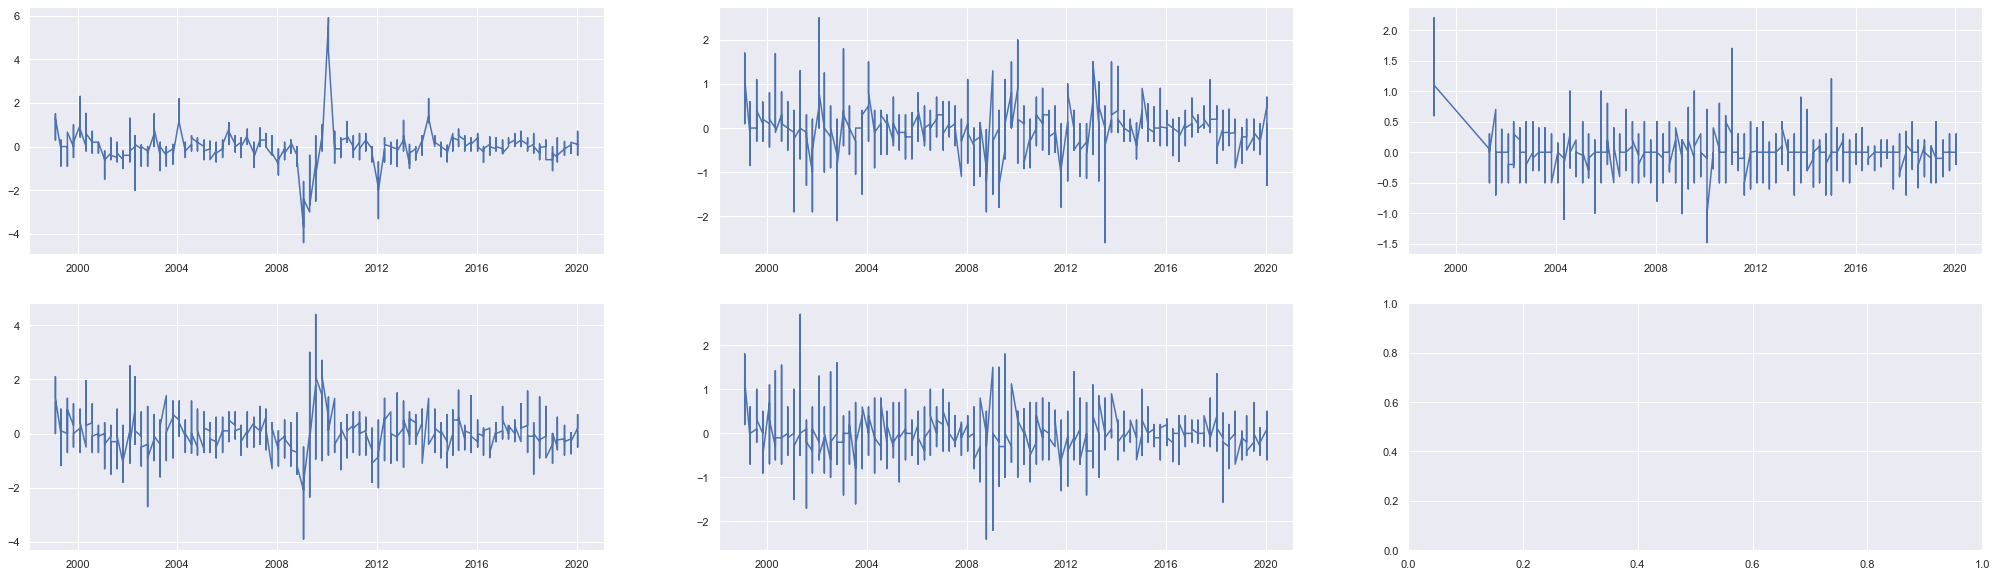

In [5]:
df_gdp['Current Year'] = df_gdp['Current Year'].astype(float)
df_gdp['One Year Ahead'] = df_gdp['One Year Ahead'].astype(float)
df_gdp['Longer Term'] = df_gdp['Longer Term'].astype(float)
df_gdp['Rolling1'] = df_gdp['Rolling1'].astype(float)
df_gdp['Rolling2'] = df_gdp['Rolling2'].astype(float)
dfgdp1 = df_gdp.sort_values(by=['Source', 'SurveyDate'],ascending = [True, True])
dfgdp1['CurrentYearDiff'] = dfgdp1['Current Year'].diff()
dfgdp1['OneYearDiff'] = dfgdp1['One Year Ahead'].diff()
dfgdp1['LongTermDiff'] = dfgdp1['Longer Term'].diff()
dfgdp1['R1'] = dfgdp1['Rolling1'].diff()
dfgdp1['R2'] = dfgdp1['Rolling2'].diff()
dfgdp1 = dfgdp1.sort_index()
#dfgdp1 = dfgdp1.dropna()
#dfgdp1.index = dfgdp1['SurveyDate']
fig, axs = plt.subplots(2, 3, figsize=(35, 10))
axs[0,0].plot(dfgdp1['CurrentYearDiff'].dropna().astype(float))
axs[0,1].plot(dfgdp1['OneYearDiff'].dropna().astype(float))
axs[0,2].plot(dfgdp1['LongTermDiff'].dropna().astype(float))
axs[1,0].plot(dfgdp1['R1'].dropna().astype(float))
axs[1,1].plot(dfgdp1['R2'].dropna().astype(float));

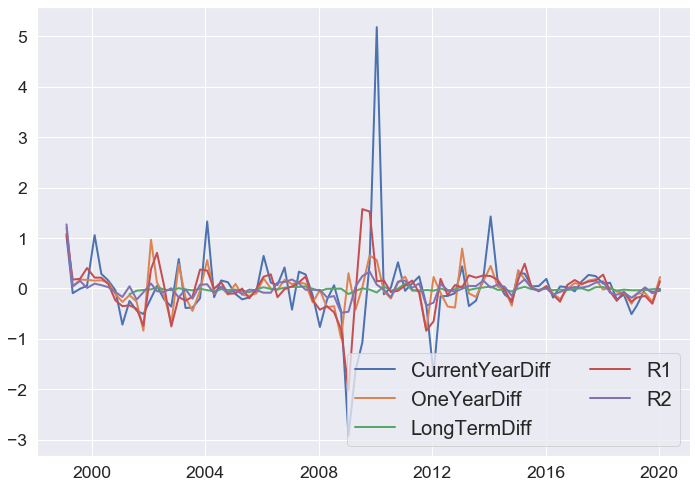

In [6]:
df1gdpmeans = dfgdp1.groupby('SurveyDate')[['CurrentYearDiff','OneYearDiff', 'LongTermDiff', 'R1', 'R2']].mean()
#df1gdpmeans.index = dfgdp1.index.unique()
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=1.6)
plt.plot(df1gdpmeans, linewidth=2.0)
plt.legend(list(df1gdpmeans), ncol=2, loc='lower right', fontsize=20);

# Here we estimate individual GMMs for each source
However this takes a while to run.. so better to skip it and alternative load the already saved results.

In [8]:
#define the class only
'''
'''
class mpGMM(GMM):
    
    def __init__(self, *args, **kwds):
        # set appropriate counts for moment conditions and parameters
        # TODO: clean up signature
        kwds.setdefault('k_moms', 10)
        kwds.setdefault('k_params', 8)
        super(mpGMM, self).__init__(*args, **kwds)


    def momcond(self, params):
        c0, c1, c2, c3, c4, c5, c6, c7 = params
        endog = self.endog
        exog = self.exog
        #defining variables
        #interaction dummies
        dQ1 = exog[:,0]
        dQ2 = exog[:,1]
        dQ3 = exog[:,2]
        dQ4 = exog[:,3]
        #dTY = exog[:,4]
        #endogenous variables
        currentY = endog[:,0]
        nextY = endog[:,1]
        #twoY = endog[:,2]
        rolling1 = endog[:,2]
        rolling2 = endog[:,3]
        #monetary policy shock
        mp = exog[:,4]
        #next year forecasts
        error11 = dQ1*(nextY-mp*(1/4*c1+1/2*c2+3/4*c3+1*c4+3/4*c5+1/2*c6+1/4*c7))
        error1 = dQ2*(nextY-mp*(1/4*c0+1/2*c1+3/4*c2+1*c3+3/4*c4+1/2*c5+1/4*c6))
        error2 = dQ3*(nextY-mp*(1/2*c0+3/4*c1+1*c2+3/4*c3+1/2*c4+1/4*c5))
        error3 = dQ4*(nextY-mp*(3/4*c0+1*c1+3/4*c2+1/2*c3+1/4*c4))
        #current year forecasts
        error12 = dQ1*(currentY-mp*(c0+3/4*c1+1/2*c2+1/4*c3))
        error4 = dQ2*(currentY-mp*(3/4*c0+1/2*c1+1/4*c2))
        error5 = dQ3*(currentY-mp*(1/2*c0+1/4*c1))
        error6 = dQ4*(currentY-mp*(1/4*c0))
        #rolling forecasts
        #r
        error13 = mp*(rolling1-mp*(c3))
        error14 = mp*(rolling2-mp*(c7))
        g = np.column_stack((error1, error2, error3, error4, error5, error6, 
                            error11, error12, error13, error14))
        return g



In [20]:
#RUN ALL THE GMMs - takes a longer time!!
gmmresults = np.zeros((150, 8))
#order data
for i in range(1, 129):
    df1gdpmeans = dfgdp1.loc[dfgdp1['Source']==i]
    dataols = pd.concat([df1gdpmeans, newdfpc], axis=1)
    dataols = dataols.dropna(subset = ['Source','CurrentYearDiff', 'OneYearDiff', 'R1', 'R2'])
    var = 'OIS_2Y'
    dataols = dataols.dropna(subset = [var]).iloc[:-1,:]
    #time periods
    #dataols = dataols.loc[(dataols.index>'2002-01-01')&(dataols.index<'2014-01-01')]
    dataols = dataols.loc[dataols.index>'2002-01-01']
    #create dummies
    dataols['D1'] = (dataols.index.month.isin([1,2])==True)*1*dataols[var]
    dataols['D2'] = (dataols.index.month.isin([3,4])==True)*1*dataols[var]
    dataols['D3'] = (dataols.index.month.isin([7,8])==True)*1*dataols[var]
    dataols['D4'] = (dataols.index.month.isin([10,11])==True)*1*dataols[var]
    #dataols['DTY'] = (dataols['TwoYearDiff'].isnull()==False)*1
    #dataols['TwoYearDiff'] = dataols['TwoYearDiff'].fillna(value=0)
    exog = dataols[['D1', 'D2', 'D3', 'D4', var]]
    #exog = dataols[[var]]
    endog = dataols[['CurrentYearDiff', 'OneYearDiff', 'R1', 'R2']].copy()
    #instr = np.asarray(exogt.iloc[:, 4:])
    try:
        model = mpGMM(endog, exog,  None)
    except:
        continue
    beta0 = np.zeros((1, 8))
    try:
        res = model.fititer(beta0, maxiter=1000, optim_method='bfgs',  weights_method='cov',
                        wargs={'centered':False})
    except:
        continue
    w0 = res[1]
    try:
        inv_weights = np.linalg.inv(w0)
    except:
        continue
    try:
        res = model.fit(beta0, maxiter=2,  inv_weights =inv_weights, optim_method='bfgs', weights_method='cov',
                    wargs={'centered':False})
    except:
        continue
    #print(res.summary(yname='GDP forecast diff', xname=['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7']))
    gmmresults[i,:] = res.params
    print('DONE WITH SOURCE'+str(i))

Optimization terminated successfully.
         Current function value: 0.012855
         Iterations: 30
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.077381
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.065514
         Iterations: 18
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.061467
         Iterations: 18
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.062561
         Iterations: 15
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.062682
         Iterations: 17
         Function evaluations: 22
  

Optimization terminated successfully.
         Current function value: 0.077137
         Iterations: 18
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.089646
         Iterations: 18
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.097038
         Iterations: 15
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.102295
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.106326
         Iterations: 17
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.109730
         Iterations: 14
         Function evaluations: 20
  

Optimization terminated successfully.
         Current function value: 0.102295
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.106326
         Iterations: 17
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.109730
         Iterations: 14
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.112850
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.115736
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.118017
         Iterations: 14
         Function evaluations: 18
  

Optimization terminated successfully.
         Current function value: 0.115736
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.118017
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.118579
         Iterations: 15
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.115784
         Iterations: 16
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.110673
         Iterations: 16
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.107840
         Iterations: 12
         Function evaluations: 18
  

Optimization terminated successfully.
         Current function value: 0.115784
         Iterations: 16
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.110673
         Iterations: 16
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.107840
         Iterations: 12
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.107454
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.014048
         Iterations: 20
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.077137
         Iterations: 18
         Function evaluations: 22
  

Optimization terminated successfully.
         Current function value: 0.077137
         Iterations: 18
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.089646
         Iterations: 18
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.097038
         Iterations: 15
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.102295
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.106326
         Iterations: 17
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.109730
         Iterations: 14
         Function evaluations: 20
  

Optimization terminated successfully.
         Current function value: 0.102295
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.106326
         Iterations: 17
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.109730
         Iterations: 14
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.112850
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.115736
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.118017
         Iterations: 14
         Function evaluations: 18
  

Optimization terminated successfully.
         Current function value: 0.112850
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.115736
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.118017
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.118579
         Iterations: 15
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.115784
         Iterations: 16
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.110673
         Iterations: 16
         Function evaluations: 22
  

Optimization terminated successfully.
         Current function value: 0.118579
         Iterations: 15
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.115784
         Iterations: 16
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.110673
         Iterations: 16
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.107840
         Iterations: 12
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.107454
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.014048
         Iterations: 20
         Function evaluations: 25
  

Optimization terminated successfully.
         Current function value: 0.107454
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.014048
         Iterations: 20
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.077137
         Iterations: 18
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.089646
         Iterations: 18
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.097038
         Iterations: 15
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.102295
         Iterations: 17
         Function evaluations: 21
  

Optimization terminated successfully.
         Current function value: 0.106326
         Iterations: 17
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.109730
         Iterations: 14
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.112850
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.115736
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.118017
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.118579
         Iterations: 15
         Function evaluations: 17
  

Optimization terminated successfully.
         Current function value: 0.115736
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.118017
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.118579
         Iterations: 15
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.115784
         Iterations: 16
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.110673
         Iterations: 16
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.107840
         Iterations: 12
         Function evaluations: 18
  

Optimization terminated successfully.
         Current function value: 0.115784
         Iterations: 16
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.110673
         Iterations: 16
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.107840
         Iterations: 12
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.107454
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.014048
         Iterations: 20
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.077137
         Iterations: 18
         Function evaluations: 22
  

Optimization terminated successfully.
         Current function value: 0.089646
         Iterations: 18
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.097038
         Iterations: 15
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.102295
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.106326
         Iterations: 17
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.109730
         Iterations: 14
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.112850
         Iterations: 14
         Function evaluations: 19
  

Optimization terminated successfully.
         Current function value: 0.109730
         Iterations: 14
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.112850
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.115736
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.118017
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.118579
         Iterations: 15
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.115784
         Iterations: 16
         Function evaluations: 20
  

Optimization terminated successfully.
         Current function value: 0.118017
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.118579
         Iterations: 15
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.115784
         Iterations: 16
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.110673
         Iterations: 16
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.107840
         Iterations: 12
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.107454
         Iterations: 14
         Function evaluations: 19
  

Optimization terminated successfully.
         Current function value: 0.077137
         Iterations: 18
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.089646
         Iterations: 18
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.097038
         Iterations: 15
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.102295
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.106326
         Iterations: 17
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.109730
         Iterations: 14
         Function evaluations: 20
  

Optimization terminated successfully.
         Current function value: 0.106326
         Iterations: 17
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.109730
         Iterations: 14
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.112850
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.115736
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.118017
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.118579
         Iterations: 15
         Function evaluations: 17
  

Optimization terminated successfully.
         Current function value: 0.115736
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.118017
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.118579
         Iterations: 15
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.115784
         Iterations: 16
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.110673
         Iterations: 16
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.107840
         Iterations: 12
         Function evaluations: 18
  

Optimization terminated successfully.
         Current function value: 0.110673
         Iterations: 16
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.107840
         Iterations: 12
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.107454
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.014048
         Iterations: 20
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.077137
         Iterations: 18
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.089646
         Iterations: 18
         Function evaluations: 22
  

Optimization terminated successfully.
         Current function value: 0.102295
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.106326
         Iterations: 17
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.109730
         Iterations: 14
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.112850
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.115736
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.118017
         Iterations: 14
         Function evaluations: 18
  

         Current function value: 0.111902
         Iterations: 22
         Function evaluations: 77
         Gradient evaluations: 67
Optimization terminated successfully.
         Current function value: 0.111902
         Iterations: 8
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.111902
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
         Current function value: 0.111902
         Iterations: 7
         Function evaluations: 66
         Gradient evaluations: 56
Optimization terminated successfully.
         Current function value: 0.111886
         Iterations: 8
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.111906
         Iterations: 13
         Function evaluations: 17
         Gradient evaluations: 17
DONE WITH SOURCE3
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.082251
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.082250
         Iterations: 7
         Function evaluations: 11
         Gradient evaluations: 11
DONE WITH SOURCE5
Optimization terminated successfully.
         Current function value: 0.003630
         Iterations: 26
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.054365
         Iterations: 15
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.071475
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.079337
         Iterations: 14
         Function e

Optimization terminated successfully.
         Current function value: 0.091252
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.091255
         Iterations: 9
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.091258
         Iterations: 8
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.091260
         Iterations: 10
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.091262
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.091264
         Iterations: 10
         Function evaluations: 14
     

Optimization terminated successfully.
         Current function value: 0.006781
         Iterations: 37
         Function evaluations: 41
         Gradient evaluations: 41
Optimization terminated successfully.
         Current function value: 0.074418
         Iterations: 22
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.000069
         Iterations: 19
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: -20170.596960
         Iterations: 3
         Function evaluations: 70
         Gradient evaluations: 59
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 32
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.001340
         Iterations: 20
         Function evaluations: 23
         Gradient evaluations: 23
Op

         Current function value: 0.054042
         Iterations: 22
         Function evaluations: 186
         Gradient evaluations: 174
         Current function value: 0.115169
         Iterations: 2
         Function evaluations: 28
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.001334
         Iterations: 18
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.042316
         Iterations: 20
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.055514
         Iterations: 20
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
     

         Current function value: 0.564677
         Iterations: 8
         Function evaluations: 29
         Gradient evaluations: 19
         Current function value: 0.564574
         Iterations: 11
         Function evaluations: 61
         Gradient evaluations: 60
         Current function value: 0.564597
         Iterations: 10
         Function evaluations: 112
         Gradient evaluations: 100
         Current function value: 0.564703
         Iterations: 11
         Function evaluations: 163
         Gradient evaluations: 148
         Current function value: 0.564536
         Iterations: 15
         Function evaluations: 130
         Gradient evaluations: 117
         Current function value: 0.564745
         Iterations: 10
         Function evaluations: 91
         Gradient evaluations: 80
         Current function value: 0.564548
         Iterations: 12
         Function evaluations: 80
         Gradient evaluations: 72
         Current function value: 0.564533
         Iterat

         Current function value: 0.564437
         Iterations: 8
         Function evaluations: 84
         Gradient evaluations: 72
         Current function value: 0.564677
         Iterations: 10
         Function evaluations: 82
         Gradient evaluations: 71
         Current function value: 0.564749
         Iterations: 8
         Function evaluations: 40
         Gradient evaluations: 28
         Current function value: 0.564631
         Iterations: 9
         Function evaluations: 75
         Gradient evaluations: 63
         Current function value: 0.564691
         Iterations: 8
         Function evaluations: 86
         Gradient evaluations: 68
         Current function value: 0.564716
         Iterations: 9
         Function evaluations: 80
         Gradient evaluations: 68
         Current function value: 0.564697
         Iterations: 10
         Function evaluations: 66
         Gradient evaluations: 65
         Current function value: 0.564663
         Iterations: 11
 

         Current function value: 0.564547
         Iterations: 9
         Function evaluations: 89
         Gradient evaluations: 78
         Current function value: 0.564655
         Iterations: 9
         Function evaluations: 51
         Gradient evaluations: 40
         Current function value: 0.564721
         Iterations: 11
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 0.564544
         Iterations: 7
         Function evaluations: 76
         Gradient evaluations: 64
         Current function value: 0.564735
         Iterations: 10
         Function evaluations: 138
         Gradient evaluations: 125
         Current function value: 0.564693
         Iterations: 11
         Function evaluations: 45
         Gradient evaluations: 44
         Current function value: 0.564669
         Iterations: 9
         Function evaluations: 61
         Gradient evaluations: 50
         Current function value: 0.564647
         Iterations: 

         Current function value: 0.564635
         Iterations: 13
         Function evaluations: 181
         Gradient evaluations: 165
         Current function value: 0.564733
         Iterations: 9
         Function evaluations: 45
         Gradient evaluations: 34
         Current function value: 0.564664
         Iterations: 10
         Function evaluations: 81
         Gradient evaluations: 69
         Current function value: 0.564704
         Iterations: 8
         Function evaluations: 62
         Gradient evaluations: 50
         Current function value: 0.564699
         Iterations: 10
         Function evaluations: 111
         Gradient evaluations: 99
         Current function value: 0.564576
         Iterations: 9
         Function evaluations: 157
         Gradient evaluations: 140
         Current function value: 0.564772
         Iterations: 7
         Function evaluations: 73
         Gradient evaluations: 62
         Current function value: 0.564746
         Iterations

         Current function value: 0.564605
         Iterations: 11
         Function evaluations: 147
         Gradient evaluations: 135
         Current function value: 0.564610
         Iterations: 7
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 0.564605
         Iterations: 10
         Function evaluations: 142
         Gradient evaluations: 130
         Current function value: 0.564586
         Iterations: 10
         Function evaluations: 49
         Gradient evaluations: 38
         Current function value: 0.564637
         Iterations: 11
         Function evaluations: 37
         Gradient evaluations: 36
         Current function value: 0.564630
         Iterations: 8
         Function evaluations: 199
         Gradient evaluations: 177
         Current function value: 0.564850
         Iterations: 8
         Function evaluations: 75
         Gradient evaluations: 64
         Current function value: 0.564742
         Iteratio

         Current function value: 0.564783
         Iterations: 8
         Function evaluations: 80
         Gradient evaluations: 69
         Current function value: 0.564639
         Iterations: 7
         Function evaluations: 33
         Gradient evaluations: 32
         Current function value: 0.564655
         Iterations: 8
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 0.564654
         Iterations: 9
         Function evaluations: 64
         Gradient evaluations: 63
         Current function value: 0.564789
         Iterations: 11
         Function evaluations: 104
         Gradient evaluations: 90
         Current function value: 0.564715
         Iterations: 9
         Function evaluations: 110
         Gradient evaluations: 99
         Current function value: 0.564673
         Iterations: 10
         Function evaluations: 250
         Gradient evaluations: 231
         Current function value: 0.564604
         Iterations: 

         Current function value: 0.564603
         Iterations: 8
         Function evaluations: 70
         Gradient evaluations: 59
         Current function value: 0.564682
         Iterations: 10
         Function evaluations: 178
         Gradient evaluations: 162
         Current function value: 0.564755
         Iterations: 8
         Function evaluations: 64
         Gradient evaluations: 53
         Current function value: 0.564654
         Iterations: 9
         Function evaluations: 67
         Gradient evaluations: 56
         Current function value: 0.564760
         Iterations: 8
         Function evaluations: 60
         Gradient evaluations: 48
         Current function value: 0.564644
         Iterations: 11
         Function evaluations: 114
         Gradient evaluations: 102
         Current function value: 0.564679
         Iterations: 9
         Function evaluations: 75
         Gradient evaluations: 63
         Current function value: 0.564678
         Iterations: 

         Current function value: 0.564768
         Iterations: 10
         Function evaluations: 128
         Gradient evaluations: 114
         Current function value: 0.564703
         Iterations: 8
         Function evaluations: 70
         Gradient evaluations: 57
         Current function value: 0.564629
         Iterations: 7
         Function evaluations: 122
         Gradient evaluations: 111
         Current function value: 0.564843
         Iterations: 7
         Function evaluations: 126
         Gradient evaluations: 115
         Current function value: 0.564730
         Iterations: 8
         Function evaluations: 48
         Gradient evaluations: 47
         Current function value: 0.564758
         Iterations: 10
         Function evaluations: 207
         Gradient evaluations: 191
         Current function value: 0.564664
         Iterations: 8
         Function evaluations: 124
         Gradient evaluations: 112
         Current function value: 0.564688
         Iterat

         Current function value: 0.564582
         Iterations: 13
         Function evaluations: 181
         Gradient evaluations: 168
         Current function value: 0.564649
         Iterations: 8
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 0.564753
         Iterations: 11
         Function evaluations: 44
         Gradient evaluations: 33
         Current function value: 0.564785
         Iterations: 6
         Function evaluations: 55
         Gradient evaluations: 44
         Current function value: 0.564636
         Iterations: 10
         Function evaluations: 109
         Gradient evaluations: 105
         Current function value: 0.564711
         Iterations: 9
         Function evaluations: 128
         Gradient evaluations: 113
         Current function value: 0.564715
         Iterations: 15
         Function evaluations: 214
         Gradient evaluations: 201
         Current function value: 0.564668
         Iterat

         Current function value: 0.564610
         Iterations: 8
         Function evaluations: 105
         Gradient evaluations: 94
         Current function value: 0.564668
         Iterations: 7
         Function evaluations: 110
         Gradient evaluations: 99
         Current function value: 0.564598
         Iterations: 9
         Function evaluations: 126
         Gradient evaluations: 114
         Current function value: 0.564734
         Iterations: 9
         Function evaluations: 100
         Gradient evaluations: 87
         Current function value: 0.564757
         Iterations: 8
         Function evaluations: 33
         Gradient evaluations: 32
         Current function value: 0.564627
         Iterations: 10
         Function evaluations: 123
         Gradient evaluations: 111
         Current function value: 0.564657
         Iterations: 7
         Function evaluations: 65
         Gradient evaluations: 54
         Current function value: 0.564604
         Iterations

         Current function value: 0.564703
         Iterations: 11
         Function evaluations: 197
         Gradient evaluations: 178
         Current function value: 0.564515
         Iterations: 8
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 0.564690
         Iterations: 7
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 0.564553
         Iterations: 11
         Function evaluations: 95
         Gradient evaluations: 82
         Current function value: 0.564542
         Iterations: 9
         Function evaluations: 80
         Gradient evaluations: 69
         Current function value: 0.564740
         Iterations: 9
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 0.564739
         Iterations: 11
         Function evaluations: 177
         Gradient evaluations: 158
         Current function value: 0.564599
         Iterations:

         Current function value: 0.564777
         Iterations: 12
         Function evaluations: 168
         Gradient evaluations: 156
         Current function value: 0.564705
         Iterations: 11
         Function evaluations: 132
         Gradient evaluations: 115
         Current function value: 0.564722
         Iterations: 8
         Function evaluations: 63
         Gradient evaluations: 62
         Current function value: 0.564621
         Iterations: 15
         Function evaluations: 133
         Gradient evaluations: 121
         Current function value: 0.564702
         Iterations: 8
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 0.564589
         Iterations: 10
         Function evaluations: 110
         Gradient evaluations: 98
         Current function value: 0.564785
         Iterations: 8
         Function evaluations: 79
         Gradient evaluations: 68
         Current function value: 0.564699
         Iterat

         Current function value: 0.564589
         Iterations: 8
         Function evaluations: 81
         Gradient evaluations: 69
         Current function value: 0.564754
         Iterations: 11
         Function evaluations: 213
         Gradient evaluations: 192
         Current function value: 0.564605
         Iterations: 10
         Function evaluations: 177
         Gradient evaluations: 164
         Current function value: 0.564677
         Iterations: 8
         Function evaluations: 95
         Gradient evaluations: 84
         Current function value: 0.564727
         Iterations: 9
         Function evaluations: 31
         Gradient evaluations: 30
         Current function value: 0.564624
         Iterations: 6
         Function evaluations: 54
         Gradient evaluations: 42
         Current function value: 0.564666
         Iterations: 10
         Function evaluations: 127
         Gradient evaluations: 115
         Current function value: 0.564786
         Iteration

         Current function value: 0.564665
         Iterations: 10
         Function evaluations: 123
         Gradient evaluations: 111
         Current function value: 0.564705
         Iterations: 9
         Function evaluations: 33
         Gradient evaluations: 22
         Current function value: 0.564591
         Iterations: 12
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 0.564558
         Iterations: 9
         Function evaluations: 169
         Gradient evaluations: 149
         Current function value: 0.564518
         Iterations: 9
         Function evaluations: 78
         Gradient evaluations: 66
         Current function value: 0.564668
         Iterations: 8
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 0.564729
         Iterations: 9
         Function evaluations: 133
         Gradient evaluations: 119
         Current function value: 0.564721
         Iteration

         Current function value: 0.564711
         Iterations: 9
         Function evaluations: 71
         Gradient evaluations: 59
         Current function value: 0.564782
         Iterations: 7
         Function evaluations: 38
         Gradient evaluations: 26
         Current function value: 0.564787
         Iterations: 9
         Function evaluations: 75
         Gradient evaluations: 60
         Current function value: 0.564706
         Iterations: 9
         Function evaluations: 69
         Gradient evaluations: 58
         Current function value: 0.564687
         Iterations: 7
         Function evaluations: 49
         Gradient evaluations: 38
         Current function value: 0.564815
         Iterations: 8
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 0.564666
         Iterations: 11
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 0.564694
         Iterations: 8
  

         Current function value: 0.564848
         Iterations: 7
         Function evaluations: 73
         Gradient evaluations: 62
         Current function value: 0.564559
         Iterations: 10
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 0.564784
         Iterations: 7
         Function evaluations: 59
         Gradient evaluations: 47
         Current function value: 0.564731
         Iterations: 7
         Function evaluations: 54
         Gradient evaluations: 42
         Current function value: 0.564649
         Iterations: 10
         Function evaluations: 81
         Gradient evaluations: 69
         Current function value: 0.564697
         Iterations: 13
         Function evaluations: 333
         Gradient evaluations: 314
         Current function value: 0.564613
         Iterations: 10
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 0.564719
         Iterations:

         Current function value: 0.564606
         Iterations: 11
         Function evaluations: 159
         Gradient evaluations: 147
         Current function value: 0.564573
         Iterations: 8
         Function evaluations: 110
         Gradient evaluations: 96
         Current function value: 0.564698
         Iterations: 8
         Function evaluations: 82
         Gradient evaluations: 68
         Current function value: 0.564664
         Iterations: 9
         Function evaluations: 81
         Gradient evaluations: 69
         Current function value: 0.564744
         Iterations: 9
         Function evaluations: 67
         Gradient evaluations: 56
         Current function value: 0.564782
         Iterations: 10
         Function evaluations: 37
         Gradient evaluations: 36
         Current function value: 0.564691
         Iterations: 9
         Function evaluations: 57
         Gradient evaluations: 46
         Current function value: 0.564820
         Iterations: 1

         Current function value: 0.564634
         Iterations: 12
         Function evaluations: 195
         Gradient evaluations: 173
         Current function value: 0.564572
         Iterations: 11
         Function evaluations: 76
         Gradient evaluations: 65
         Current function value: 0.564629
         Iterations: 8
         Function evaluations: 115
         Gradient evaluations: 103
         Current function value: 0.564762
         Iterations: 7
         Function evaluations: 101
         Gradient evaluations: 90
         Current function value: 0.564719
         Iterations: 7
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 0.564650
         Iterations: 10
         Function evaluations: 63
         Gradient evaluations: 51
         Current function value: 0.564721
         Iterations: 12
         Function evaluations: 138
         Gradient evaluations: 126
         Current function value: 0.564880
         Iterati

         Current function value: 0.564706
         Iterations: 11
         Function evaluations: 143
         Gradient evaluations: 130
         Current function value: 0.564773
         Iterations: 9
         Function evaluations: 158
         Gradient evaluations: 144
         Current function value: 0.564627
         Iterations: 10
         Function evaluations: 26
         Gradient evaluations: 25
         Current function value: 0.564602
         Iterations: 10
         Function evaluations: 114
         Gradient evaluations: 101
         Current function value: 0.564528
         Iterations: 7
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 0.564642
         Iterations: 11
         Function evaluations: 53
         Gradient evaluations: 52
         Current function value: 0.564522
         Iterations: 9
         Function evaluations: 117
         Gradient evaluations: 104
         Current function value: 0.564684
         Iterat

         Current function value: 0.564685
         Iterations: 11
         Function evaluations: 121
         Gradient evaluations: 109
         Current function value: 0.564602
         Iterations: 7
         Function evaluations: 16
         Gradient evaluations: 15
         Current function value: 0.564634
         Iterations: 8
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 0.564682
         Iterations: 10
         Function evaluations: 135
         Gradient evaluations: 123
         Current function value: 0.564751
         Iterations: 11
         Function evaluations: 40
         Gradient evaluations: 39
         Current function value: 0.564690
         Iterations: 8
         Function evaluations: 97
         Gradient evaluations: 86
         Current function value: 0.564699
         Iterations: 8
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 0.564572
         Iteration

         Current function value: 0.564752
         Iterations: 7
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 0.564653
         Iterations: 9
         Function evaluations: 55
         Gradient evaluations: 54
         Current function value: 0.564768
         Iterations: 7
         Function evaluations: 70
         Gradient evaluations: 59
         Current function value: 0.564788
         Iterations: 9
         Function evaluations: 88
         Gradient evaluations: 78
         Current function value: 0.564650
         Iterations: 9
         Function evaluations: 38
         Gradient evaluations: 37
         Current function value: 0.564729
         Iterations: 8
         Function evaluations: 128
         Gradient evaluations: 116
         Current function value: 0.564617
         Iterations: 8
         Function evaluations: 168
         Gradient evaluations: 156
         Current function value: 0.564576
         Iterations: 7


         Current function value: 0.564685
         Iterations: 11
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 0.564694
         Iterations: 6
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 0.564760
         Iterations: 9
         Function evaluations: 148
         Gradient evaluations: 134
         Current function value: 0.564679
         Iterations: 11
         Function evaluations: 142
         Gradient evaluations: 130
         Current function value: 0.564502
         Iterations: 10
         Function evaluations: 142
         Gradient evaluations: 126
         Current function value: 0.564711
         Iterations: 7
         Function evaluations: 40
         Gradient evaluations: 28
         Current function value: 0.564763
         Iterations: 8
         Function evaluations: 96
         Gradient evaluations: 85
         Current function value: 0.564777
         Iteratio

         Current function value: 0.564495
         Iterations: 13
         Function evaluations: 183
         Gradient evaluations: 170
         Current function value: 0.564497
         Iterations: 10
         Function evaluations: 88
         Gradient evaluations: 77
         Current function value: 0.564702
         Iterations: 8
         Function evaluations: 26
         Gradient evaluations: 25
         Current function value: 0.564782
         Iterations: 13
         Function evaluations: 201
         Gradient evaluations: 194
         Current function value: 0.564540
         Iterations: 9
         Function evaluations: 176
         Gradient evaluations: 158
         Current function value: 0.564643
         Iterations: 11
         Function evaluations: 185
         Gradient evaluations: 173
         Current function value: 0.564765
         Iterations: 9
         Function evaluations: 72
         Gradient evaluations: 60
         Current function value: 0.564761
         Iterat

Optimization terminated successfully.
         Current function value: 0.135431
         Iterations: 18
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.135658
         Iterations: 18
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.135839
         Iterations: 18
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.135982
         Iterations: 18
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.136095
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.136184
         Iterations: 17
         Function evaluations: 22
  

Optimization terminated successfully.
         Current function value: 0.061431
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.061431
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.061431
         Iterations: 18
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.061431
         Iterations: 13
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.061431
         Iterations: 9
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.061431
         Iterations: 9
         Function evaluations: 13
    

Optimization terminated successfully.
         Current function value: 0.143780
         Iterations: 19
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.161637
         Iterations: 20
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.170251
         Iterations: 21
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.171645
         Iterations: 20
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.167348
         Iterations: 21
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.160358
         Iterations: 21
         Function evaluations: 24
  

Optimization terminated successfully.
         Current function value: 0.163553
         Iterations: 21
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.156357
         Iterations: 21
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.150084
         Iterations: 21
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.145195
         Iterations: 21
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.141518
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.138757
         Iterations: 21
         Function evaluations: 23
  

Optimization terminated successfully.
         Current function value: 0.163555
         Iterations: 21
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.156359
         Iterations: 21
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.150086
         Iterations: 21
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.145197
         Iterations: 21
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.141519
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.138758
         Iterations: 21
         Function evaluations: 23
  

Optimization terminated successfully.
         Current function value: 0.150082
         Iterations: 21
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.145194
         Iterations: 21
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.141517
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.138757
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.136664
         Iterations: 16
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.135055
         Iterations: 21
         Function evaluations: 25
  

Optimization terminated successfully.
         Current function value: 0.141519
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.138758
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.136665
         Iterations: 16
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.135056
         Iterations: 21
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.133800
         Iterations: 20
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.132806
         Iterations: 13
         Function evaluations: 17
  

Optimization terminated successfully.
         Current function value: 0.135056
         Iterations: 21
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.133801
         Iterations: 20
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.132806
         Iterations: 13
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.132008
         Iterations: 15
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.131357
         Iterations: 18
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.130819
         Iterations: 21
         Function evaluations: 26
  

Optimization terminated successfully.
         Current function value: 0.132008
         Iterations: 15
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.131357
         Iterations: 18
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.130819
         Iterations: 21
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.130366
         Iterations: 17
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.129979
         Iterations: 22
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.129644
         Iterations: 22
         Function evaluations: 26
  

Optimization terminated successfully.
         Current function value: 0.130365
         Iterations: 17
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.129979
         Iterations: 22
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.129643
         Iterations: 25
         Function evaluations: 280
         Gradient evaluations: 263
Optimization terminated successfully.
         Current function value: 0.129348
         Iterations: 21
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.129084
         Iterations: 19
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.128846
         Iterations: 23
         Function evaluations: 31
         Gradient evaluations: 31
Opti

         Current function value: 0.129643
         Iterations: 23
         Function evaluations: 114
         Gradient evaluations: 102
Optimization terminated successfully.
         Current function value: 0.129348
         Iterations: 24
         Function evaluations: 109
         Gradient evaluations: 105
Optimization terminated successfully.
         Current function value: 0.129084
         Iterations: 20
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.128846
         Iterations: 22
         Function evaluations: 106
         Gradient evaluations: 95
Optimization terminated successfully.
         Current function value: 0.128628
         Iterations: 21
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.128427
         Iterations: 23
         Function evaluations: 72
         Gradient evaluations: 66
         Current function value: 0.1282

Optimization terminated successfully.
         Current function value: 0.075518
         Iterations: 9
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.075441
         Iterations: 11
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.075367
         Iterations: 9
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.075294
         Iterations: 11
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.075222
         Iterations: 11
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.075153
         Iterations: 12
         Function evaluations: 17
    

Optimization terminated successfully.
         Current function value: 0.074613
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.074682
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.074756
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.074835
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.074918
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.075007
         Iterations: 14
         Function evaluations: 18
  

Optimization terminated successfully.
         Current function value: 0.085726
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.086150
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.086584
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.087028
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.087481
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.087944
         Iterations: 14
         Function evaluations: 19
  

Optimization terminated successfully.
         Current function value: 0.117781
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.118700
         Iterations: 14
         Function evaluations: 20
         Gradient evaluations: 20
         Current function value: 0.119627
         Iterations: 13
         Function evaluations: 77
         Gradient evaluations: 66
Optimization terminated successfully.
         Current function value: 0.120563
         Iterations: 14
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.121508
         Iterations: 13
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.122460
         Iterations: 13
         Function evaluations: 17
         Gradient evaluations: 17
Optimi

Optimization terminated successfully.
         Current function value: 0.169111
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.170109
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.171100
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.172084
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.173060
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.174029
         Iterations: 14
         Function evaluations: 19
  

Optimization terminated successfully.
         Current function value: 0.207000
         Iterations: 12
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.207571
         Iterations: 12
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.208135
         Iterations: 12
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.208692
         Iterations: 12
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.209241
         Iterations: 12
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.209784
         Iterations: 13
         Function evaluations: 20
  

Optimization terminated successfully.
         Current function value: 0.228686
         Iterations: 13
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.229038
         Iterations: 13
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.229389
         Iterations: 13
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.229737
         Iterations: 13
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.230083
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.230428
         Iterations: 14
         Function evaluations: 20
  

Optimization terminated successfully.
         Current function value: 0.244439
         Iterations: 14
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.244748
         Iterations: 14
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.245058
         Iterations: 13
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.245369
         Iterations: 14
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.245680
         Iterations: 14
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.245991
         Iterations: 13
         Function evaluations: 19
  

Optimization terminated successfully.
         Current function value: 0.261667
         Iterations: 13
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.262176
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.262702
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.263247
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.263813
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.264404
         Iterations: 13
         Function evaluations: 18
  

         Current function value: 0.231628
         Iterations: 16
         Function evaluations: 62
         Gradient evaluations: 51
Optimization terminated successfully.
         Current function value: 0.231004
         Iterations: 17
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.234281
         Iterations: 13
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.231613
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
         Current function value: 0.231634
         Iterations: 66
         Function evaluations: 202
         Gradient evaluations: 190
Optimization terminated successfully.
         Current function value: 0.230979
         Iterations: 18
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
    

         Current function value: 0.231643
         Iterations: 16
         Function evaluations: 75
         Gradient evaluations: 63
Optimization terminated successfully.
         Current function value: 0.230937
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.234606
         Iterations: 12
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.231626
         Iterations: 14
         Function evaluations: 20
         Gradient evaluations: 20
         Current function value: 0.231643
         Iterations: 28
         Function evaluations: 96
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 0.230937
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
      

         Current function value: 0.231643
         Iterations: 23
         Function evaluations: 123
         Gradient evaluations: 112
Optimization terminated successfully.
         Current function value: 0.230937
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.234607
         Iterations: 12
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.231627
         Iterations: 14
         Function evaluations: 20
         Gradient evaluations: 20
         Current function value: 0.231643
         Iterations: 20
         Function evaluations: 98
         Gradient evaluations: 88
Optimization terminated successfully.
         Current function value: 0.230937
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
    

         Current function value: 0.231643
         Iterations: 46
         Function evaluations: 171
         Gradient evaluations: 159
Optimization terminated successfully.
         Current function value: 0.230937
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.234607
         Iterations: 12
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.231627
         Iterations: 14
         Function evaluations: 20
         Gradient evaluations: 20
         Current function value: 0.231643
         Iterations: 13
         Function evaluations: 112
         Gradient evaluations: 100
Optimization terminated successfully.
         Current function value: 0.230937
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
  

Optimization terminated successfully.
         Current function value: 0.230937
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.234607
         Iterations: 12
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.231627
         Iterations: 14
         Function evaluations: 20
         Gradient evaluations: 20
         Current function value: 0.231643
         Iterations: 21
         Function evaluations: 93
         Gradient evaluations: 81
Optimization terminated successfully.
         Current function value: 0.230937
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.234607
         Iterations: 12
         Function evaluations: 18
         Gradient evaluations: 18
Optimi

         Current function value: 0.231643
         Iterations: 32
         Function evaluations: 147
         Gradient evaluations: 135
Optimization terminated successfully.
         Current function value: 0.230937
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.234607
         Iterations: 12
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.231627
         Iterations: 14
         Function evaluations: 20
         Gradient evaluations: 20
         Current function value: 0.231643
         Iterations: 47
         Function evaluations: 149
         Gradient evaluations: 137
Optimization terminated successfully.
         Current function value: 0.230937
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
  

         Current function value: 0.231643
         Iterations: 32
         Function evaluations: 171
         Gradient evaluations: 160
Optimization terminated successfully.
         Current function value: 0.230937
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.234607
         Iterations: 12
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.231627
         Iterations: 14
         Function evaluations: 20
         Gradient evaluations: 20
         Current function value: 0.231643
         Iterations: 19
         Function evaluations: 101
         Gradient evaluations: 90
Optimization terminated successfully.
         Current function value: 0.230937
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
   

         Current function value: 0.231643
         Iterations: 35
         Function evaluations: 126
         Gradient evaluations: 114
Optimization terminated successfully.
         Current function value: 0.230937
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.234607
         Iterations: 12
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.231627
         Iterations: 14
         Function evaluations: 20
         Gradient evaluations: 20
         Current function value: 0.231643
         Iterations: 21
         Function evaluations: 199
         Gradient evaluations: 182
Optimization terminated successfully.
         Current function value: 0.230937
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
  

         Current function value: 0.231643
         Iterations: 31
         Function evaluations: 174
         Gradient evaluations: 162
Optimization terminated successfully.
         Current function value: 0.230937
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.234607
         Iterations: 12
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.231627
         Iterations: 14
         Function evaluations: 20
         Gradient evaluations: 20
         Current function value: 0.231643
         Iterations: 51
         Function evaluations: 113
         Gradient evaluations: 104
Optimization terminated successfully.
         Current function value: 0.230937
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
  

         Current function value: 0.231643
         Iterations: 32
         Function evaluations: 87
         Gradient evaluations: 75
Optimization terminated successfully.
         Current function value: 0.230937
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.234607
         Iterations: 12
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.231627
         Iterations: 14
         Function evaluations: 20
         Gradient evaluations: 20
         Current function value: 0.231643
         Iterations: 24
         Function evaluations: 171
         Gradient evaluations: 154
Optimization terminated successfully.
         Current function value: 0.230937
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
    

         Current function value: 0.231643
         Iterations: 26
         Function evaluations: 135
         Gradient evaluations: 120
Optimization terminated successfully.
         Current function value: 0.230937
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.234607
         Iterations: 12
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.231627
         Iterations: 14
         Function evaluations: 20
         Gradient evaluations: 20
         Current function value: 0.231643
         Iterations: 38
         Function evaluations: 167
         Gradient evaluations: 155
Optimization terminated successfully.
         Current function value: 0.230937
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
  

Optimization terminated successfully.
         Current function value: 0.230937
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.234607
         Iterations: 12
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.231627
         Iterations: 14
         Function evaluations: 20
         Gradient evaluations: 20
         Current function value: 0.231643
         Iterations: 42
         Function evaluations: 127
         Gradient evaluations: 115
Optimization terminated successfully.
         Current function value: 0.230937
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.234607
         Iterations: 12
         Function evaluations: 18
         Gradient evaluations: 18
Opti

Optimization terminated successfully.
         Current function value: 0.004328
         Iterations: 20
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.004328
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
DONE WITH SOURCE22
Optimization terminated successfully.
         Current function value: 0.002861
         Iterations: 17
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.006159
         Iterations: 17
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.006599
         Iterations: 17
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.006602
         Iterations: 17
         Function ev

Optimization terminated successfully.
         Current function value: 0.037153
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.037146
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.037141
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.037138
         Iterations: 7
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.037136
         Iterations: 7
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.037135
         Iterations: 7
         Function evaluations: 12
      

Optimization terminated successfully.
         Current function value: 0.193996
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.194509
         Iterations: 10
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.194940
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.195303
         Iterations: 11
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.195608
         Iterations: 11
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.195864
         Iterations: 11
         Function evaluations: 14
  

Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 11
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 10
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 10
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 10
         Function evaluations: 15
    

Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 8
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 8
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 8
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 9
         Function evaluations: 15
        

Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 7
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 7
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 7
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 7
         Function evaluations: 13
        

Optimization terminated successfully.
         Current function value: 0.197240
         Iterations: 8
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197240
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.197240
         Iterations: 8
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197240
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.197239
         Iterations: 8
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197239
         Iterations: 9
         Function evaluations: 15
        

Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.197239
         Iterations: 7
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 7
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 7
         Function evaluations: 13
        

Optimization terminated successfully.
         Current function value: 0.194318
         Iterations: 12
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.195575
         Iterations: 11
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.195334
         Iterations: 11
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.195726
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.195886
         Iterations: 11
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.196106
         Iterations: 11
         Function evaluations: 16
  

Optimization terminated successfully.
         Current function value: 0.197237
         Iterations: 8
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197237
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 8
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 8
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 9
         Function evaluations: 15
        

Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 7
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 7
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 7
         Function evaluations: 13
        

Optimization terminated successfully.
         Current function value: 0.197234
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.197235
         Iterations: 8
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197235
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.197236
         Iterations: 8
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197236
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.197236
         Iterations: 8
         Function evaluations: 13
        

Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 7
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 7
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 8
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 7
         Function evaluations: 13
        

Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 8
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 8
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 8
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 9
         Function evaluations: 15
        

Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 7
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 7
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 7
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 9
         Function evaluations: 13
        

Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 8
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 8
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 8
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 8
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 8
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 8
         Function evaluations: 13
        

         Current function value: 0.197238
         Iterations: 33
         Function evaluations: 165
         Gradient evaluations: 153
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 7
         Function evaluations: 13
         Gradient evaluations: 13
         Current function value: 0.197175
         Iterations: 9
         Function evaluations: 136
         Gradient evaluations: 124
Optimization terminated successfully.
         Current function value: 0.201054
         Iterations: 10
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.196327
         Iterations: 10
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.197542
         Iterations: 11
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
    

Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 8
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 8
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 8
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 8
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 8
         Function evaluations: 13
        

Optimization terminated successfully.
         Current function value: 0.196750
         Iterations: 9
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.196817
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.196907
         Iterations: 9
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.196962
         Iterations: 10
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.197010
         Iterations: 9
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.197046
         Iterations: 10
         Function evaluations: 14
      

Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 7
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 7
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 7
         Function evaluations: 13
        

Optimization terminated successfully.
         Current function value: 0.197386
         Iterations: 10
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.197363
         Iterations: 10
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.197343
         Iterations: 10
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.197327
         Iterations: 10
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.197313
         Iterations: 11
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.197301
         Iterations: 10
         Function evaluations: 15
  

Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 8
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 8
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 8
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.197238
         Iterations: 9
         Function evaluations: 15
        

Optimization terminated successfully.
         Current function value: 0.023173
         Iterations: 7
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.023173
         Iterations: 4
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.023173
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.023173
         Iterations: 4
         Function evaluations: 8
         Gradient evaluations: 8
DONE WITH SOURCE29
Optimization terminated successfully.
         Current function value: 0.000052
         Iterations: 31
         Function evaluations: 38
         Gradient evaluations: 38
         Current function value: 0.196354
         Iterations: 6
         Function evaluations: 58
         Gradient evaluations

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 13
    

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 17
   

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 14
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 10
         Function evaluations: 14


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 14
   

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 9
         Function evaluations: 12
   

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 10
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 12
    

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 10
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 13
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 9
         Function evaluations: 12


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 10
         Function evaluations: 13
 

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 8
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 14
 

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 10
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 11
         Function evaluations: 16

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 10
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 14
   

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 10
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 15
   

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 12
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 9
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 17
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 15
  

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 12
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 11
         Function evaluations: 16


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 12
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 16
    

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 13
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 8
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 15
   

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 12
         Function evaluations: 19


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 11
         Function evaluations: 18
 

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 11
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.010773
         Iterations: 21
         Function evaluations: 27
 

Optimization terminated successfully.
         Current function value: 0.272146
         Iterations: 10
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.248233
         Iterations: 9
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.266120
         Iterations: 10
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.266272
         Iterations: 8
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.266893
         Iterations: 8
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.266845
         Iterations: 8
         Function evaluations: 14
      

Optimization terminated successfully.
         Current function value: 0.005340
         Iterations: 14
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.005356
         Iterations: 13
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.005358
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.005359
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.005359
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.005359
         Iterations: 1
         Function evaluations: 3
     

Optimization terminated successfully.
         Current function value: 0.006465
         Iterations: 10
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.006465
         Iterations: 10
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.006465
         Iterations: 7
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.006465
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.006465
         Iterations: 15
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.006465
         Iterations: 7
         Function evaluations: 12
       

         Current function value: 0.129829
         Iterations: 22
         Function evaluations: 111
         Gradient evaluations: 99
Optimization terminated successfully.
         Current function value: 0.129924
         Iterations: 22
         Function evaluations: 45
         Gradient evaluations: 45
         Current function value: 0.130017
         Iterations: 29
         Function evaluations: 284
         Gradient evaluations: 261
         Current function value: 0.130108
         Iterations: 23
         Function evaluations: 120
         Gradient evaluations: 109
         Current function value: 0.130198
         Iterations: 20
         Function evaluations: 114
         Gradient evaluations: 102
Optimization terminated successfully.
         Current function value: 0.130287
         Iterations: 20
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.130374
         Iterations: 21
         Function evaluations: 163
         Gra

         Current function value: 0.132738
         Iterations: 24
         Function evaluations: 150
         Gradient evaluations: 140
         Current function value: 0.132787
         Iterations: 20
         Function evaluations: 453
         Gradient evaluations: 416
Optimization terminated successfully.
         Current function value: 0.132835
         Iterations: 19
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.132882
         Iterations: 17
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 0.132929
         Iterations: 20
         Function evaluations: 113
         Gradient evaluations: 103
         Current function value: 0.132974
         Iterations: 18
         Function evaluations: 234
         Gradient evaluations: 218
         Current function value: 0.133020
         Iterations: 24
         Function evaluations: 119
         Gradient evaluations: 107
         Curre

         Current function value: 0.134313
         Iterations: 17
         Function evaluations: 231
         Gradient evaluations: 217
         Current function value: 0.134340
         Iterations: 19
         Function evaluations: 140
         Gradient evaluations: 128
         Current function value: 0.134365
         Iterations: 15
         Function evaluations: 197
         Gradient evaluations: 184
         Current function value: 0.134391
         Iterations: 24
         Function evaluations: 161
         Gradient evaluations: 149
         Current function value: 0.134417
         Iterations: 23
         Function evaluations: 174
         Gradient evaluations: 162
         Current function value: 0.134443
         Iterations: 15
         Function evaluations: 159
         Gradient evaluations: 142
         Current function value: 0.134464
         Iterations: 12
         Function evaluations: 69
         Gradient evaluations: 57
         Current function value: 0.134491
        

         Current function value: 0.135151
         Iterations: 6
         Function evaluations: 110
         Gradient evaluations: 98
         Current function value: 0.135163
         Iterations: 16
         Function evaluations: 69
         Gradient evaluations: 57
         Current function value: 0.135179
         Iterations: 10
         Function evaluations: 99
         Gradient evaluations: 88
         Current function value: 0.135190
         Iterations: 20
         Function evaluations: 159
         Gradient evaluations: 147
         Current function value: 0.135211
         Iterations: 10
         Function evaluations: 140
         Gradient evaluations: 128
         Current function value: 0.135224
         Iterations: 16
         Function evaluations: 246
         Gradient evaluations: 222
         Current function value: 0.135240
         Iterations: 18
         Function evaluations: 131
         Gradient evaluations: 119
         Current function value: 0.135258
         Ite

         Current function value: 0.135631
         Iterations: 13
         Function evaluations: 135
         Gradient evaluations: 123
         Current function value: 0.135652
         Iterations: 7
         Function evaluations: 115
         Gradient evaluations: 98
         Current function value: 0.135661
         Iterations: 18
         Function evaluations: 115
         Gradient evaluations: 103
         Current function value: 0.135664
         Iterations: 9
         Function evaluations: 185
         Gradient evaluations: 173
         Current function value: 0.135672
         Iterations: 13
         Function evaluations: 88
         Gradient evaluations: 78
         Current function value: 0.135689
         Iterations: 7
         Function evaluations: 133
         Gradient evaluations: 116
         Current function value: 0.135691
         Iterations: 15
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 0.135708
         Itera

         Current function value: 0.135932
         Iterations: 6
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 0.135936
         Iterations: 16
         Function evaluations: 56
         Gradient evaluations: 44
         Current function value: 0.135940
         Iterations: 4
         Function evaluations: 64
         Gradient evaluations: 53
         Current function value: 0.135944
         Iterations: 14
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 0.135961
         Iterations: 6
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 0.135968
         Iterations: 20
         Function evaluations: 160
         Gradient evaluations: 149
         Current function value: 0.135988
         Iterations: 6
         Function evaluations: 207
         Gradient evaluations: 189
         Current function value: 0.135986
         Iterations

         Current function value: 0.136166
         Iterations: 6
         Function evaluations: 174
         Gradient evaluations: 162
         Current function value: 0.136169
         Iterations: 15
         Function evaluations: 172
         Gradient evaluations: 160
         Current function value: 0.136166
         Iterations: 5
         Function evaluations: 166
         Gradient evaluations: 145
         Current function value: 0.136163
         Iterations: 3
         Function evaluations: 123
         Gradient evaluations: 111
         Current function value: 0.136162
         Iterations: 15
         Function evaluations: 117
         Gradient evaluations: 105
         Current function value: 0.136181
         Iterations: 5
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 0.136181
         Iterations: 13
         Function evaluations: 108
         Gradient evaluations: 97
         Current function value: 0.136208
         Ite

         Current function value: -264.161843
         Iterations: 25
         Function evaluations: 152
         Gradient evaluations: 140
         Current function value: 0.229659
         Iterations: 16
         Function evaluations: 75
         Gradient evaluations: 64
DONE WITH SOURCE47
Optimization terminated successfully.
         Current function value: 0.000426
         Iterations: 27
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.066080
         Iterations: 10
         Function evaluations: 134
         Gradient evaluations: 122
Optimization terminated successfully.
         Current function value: 0.073189
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.077480
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current f

Optimization terminated successfully.
         Current function value: 0.137044
         Iterations: 11
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.137061
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
         Current function value: -1.433666
         Iterations: 15
         Function evaluations: 142
         Gradient evaluations: 130
Optimization terminated successfully.
         Current function value: 0.000995
         Iterations: 34
         Function evaluations: 44
         Gradient evaluations: 44
Optimization terminated successfully.
         Current function value: 0.102649
         Iterations: 28
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 0.097350
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30
Opt

Optimization terminated successfully.
         Current function value: 0.136871
         Iterations: 15
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.136912
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.136948
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.136979
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
         Current function value: 0.137005
         Iterations: 14
         Function evaluations: 142
         Gradient evaluations: 130
Optimization terminated successfully.
         Current function value: 0.137034
         Iterations: 13
         Function evaluations: 16
         Gradient evaluations: 16
    

         Current function value: -251.790035
         Iterations: 17
         Function evaluations: 144
         Gradient evaluations: 132
         Current function value: 0.416787
         Iterations: 9
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 0.416556
         Iterations: 7
         Function evaluations: 52
         Gradient evaluations: 40
         Current function value: 0.416864
         Iterations: 10
         Function evaluations: 129
         Gradient evaluations: 111
         Current function value: 0.416432
         Iterations: 8
         Function evaluations: 19
         Gradient evaluations: 18
         Current function value: 0.416439
         Iterations: 9
         Function evaluations: 158
         Gradient evaluations: 144
         Current function value: 0.414645
         Iterations: 10
         Function evaluations: 121
         Gradient evaluations: 109
         Current function value: 0.415380
         Iter

         Current function value: 0.416709
         Iterations: 9
         Function evaluations: 112
         Gradient evaluations: 101
         Current function value: 0.416149
         Iterations: 10
         Function evaluations: 164
         Gradient evaluations: 146
         Current function value: 0.483499
         Iterations: 4
         Function evaluations: 61
         Gradient evaluations: 51
         Current function value: 0.416477
         Iterations: 11
         Function evaluations: 278
         Gradient evaluations: 249
         Current function value: 0.416793
         Iterations: 12
         Function evaluations: 132
         Gradient evaluations: 118
         Current function value: 0.416219
         Iterations: 10
         Function evaluations: 186
         Gradient evaluations: 165
         Current function value: 0.416312
         Iterations: 10
         Function evaluations: 213
         Gradient evaluations: 201
         Current function value: 0.416649
         I

         Current function value: 0.416788
         Iterations: 10
         Function evaluations: 265
         Gradient evaluations: 251
         Current function value: 0.415876
         Iterations: 11
         Function evaluations: 44
         Gradient evaluations: 33
         Current function value: 0.483762
         Iterations: 3
         Function evaluations: 113
         Gradient evaluations: 103
         Current function value: 0.416446
         Iterations: 9
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 0.415937
         Iterations: 9
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 0.415957
         Iterations: 8
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 0.417213
         Iterations: 9
         Function evaluations: 52
         Gradient evaluations: 38
         Current function value: 0.416355
         Iterations:

         Current function value: 0.416282
         Iterations: 9
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 0.415796
         Iterations: 9
         Function evaluations: 63
         Gradient evaluations: 51
         Current function value: 0.483838
         Iterations: 3
         Function evaluations: 56
         Gradient evaluations: 46
         Current function value: 0.416106
         Iterations: 10
         Function evaluations: 78
         Gradient evaluations: 66
         Current function value: 0.416016
         Iterations: 8
         Function evaluations: 132
         Gradient evaluations: 121
         Current function value: 0.417066
         Iterations: 10
         Function evaluations: 132
         Gradient evaluations: 121
         Current function value: 0.415746
         Iterations: 10
         Function evaluations: 176
         Gradient evaluations: 161
         Current function value: 0.417025
         Iteration

         Current function value: 0.415956
         Iterations: 9
         Function evaluations: 145
         Gradient evaluations: 129
         Current function value: 0.416373
         Iterations: 11
         Function evaluations: 67
         Gradient evaluations: 56
         Current function value: 0.416392
         Iterations: 10
         Function evaluations: 112
         Gradient evaluations: 100
         Current function value: 0.416361
         Iterations: 14
         Function evaluations: 78
         Gradient evaluations: 67
         Current function value: 0.484310
         Iterations: 3
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 0.416430
         Iterations: 8
         Function evaluations: 82
         Gradient evaluations: 71
         Current function value: 0.416601
         Iterations: 11
         Function evaluations: 113
         Gradient evaluations: 98
         Current function value: 0.416533
         Iteration

         Current function value: 0.417056
         Iterations: 7
         Function evaluations: 126
         Gradient evaluations: 114
         Current function value: 0.416615
         Iterations: 7
         Function evaluations: 73
         Gradient evaluations: 61
         Current function value: 0.416829
         Iterations: 11
         Function evaluations: 118
         Gradient evaluations: 106
         Current function value: 0.416504
         Iterations: 9
         Function evaluations: 69
         Gradient evaluations: 57
         Current function value: 0.415914
         Iterations: 10
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 0.416739
         Iterations: 10
         Function evaluations: 245
         Gradient evaluations: 220
         Current function value: 0.416757
         Iterations: 7
         Function evaluations: 82
         Gradient evaluations: 71
         Current function value: 0.416716
         Iteration

         Current function value: 0.416429
         Iterations: 10
         Function evaluations: 159
         Gradient evaluations: 147
         Current function value: 0.484157
         Iterations: 2
         Function evaluations: 106
         Gradient evaluations: 95
         Current function value: 0.483263
         Iterations: 3
         Function evaluations: 63
         Gradient evaluations: 51
         Current function value: 0.416667
         Iterations: 9
         Function evaluations: 109
         Gradient evaluations: 98
         Current function value: 0.416677
         Iterations: 10
         Function evaluations: 126
         Gradient evaluations: 114
         Current function value: 0.416665
         Iterations: 9
         Function evaluations: 128
         Gradient evaluations: 116
         Current function value: 0.416381
         Iterations: 8
         Function evaluations: 80
         Gradient evaluations: 69
         Current function value: 0.484076
         Iteratio

         Current function value: 0.416250
         Iterations: 11
         Function evaluations: 180
         Gradient evaluations: 162
         Current function value: 0.416325
         Iterations: 11
         Function evaluations: 86
         Gradient evaluations: 75
         Current function value: 0.416573
         Iterations: 8
         Function evaluations: 66
         Gradient evaluations: 56
         Current function value: 0.416671
         Iterations: 8
         Function evaluations: 129
         Gradient evaluations: 118
         Current function value: 0.416287
         Iterations: 8
         Function evaluations: 117
         Gradient evaluations: 106
         Current function value: 0.416716
         Iterations: 8
         Function evaluations: 59
         Gradient evaluations: 48
         Current function value: 0.416490
         Iterations: 9
         Function evaluations: 189
         Gradient evaluations: 177
         Current function value: 0.416157
         Iteratio

         Current function value: 0.416389
         Iterations: 9
         Function evaluations: 99
         Gradient evaluations: 88
         Current function value: 0.416497
         Iterations: 11
         Function evaluations: 68
         Gradient evaluations: 56
         Current function value: 0.417025
         Iterations: 7
         Function evaluations: 44
         Gradient evaluations: 33
         Current function value: 0.416356
         Iterations: 13
         Function evaluations: 167
         Gradient evaluations: 152
         Current function value: 0.416346
         Iterations: 7
         Function evaluations: 123
         Gradient evaluations: 112
         Current function value: 0.416348
         Iterations: 14
         Function evaluations: 126
         Gradient evaluations: 114
         Current function value: 0.484229
         Iterations: 4
         Function evaluations: 64
         Gradient evaluations: 54
         Current function value: 0.416384
         Iteration

         Current function value: 0.416920
         Iterations: 8
         Function evaluations: 118
         Gradient evaluations: 96
         Current function value: 0.483548
         Iterations: 4
         Function evaluations: 108
         Gradient evaluations: 99
         Current function value: 0.483387
         Iterations: 4
         Function evaluations: 200
         Gradient evaluations: 184
         Current function value: 0.416495
         Iterations: 10
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 0.415796
         Iterations: 12
         Function evaluations: 207
         Gradient evaluations: 189
         Current function value: 0.416800
         Iterations: 12
         Function evaluations: 125
         Gradient evaluations: 114
         Current function value: 0.416620
         Iterations: 9
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 0.483551
         Iterat

         Current function value: 0.415942
         Iterations: 8
         Function evaluations: 146
         Gradient evaluations: 129
         Current function value: 0.483294
         Iterations: 4
         Function evaluations: 78
         Gradient evaluations: 67
         Current function value: 0.416871
         Iterations: 9
         Function evaluations: 35
         Gradient evaluations: 24
         Current function value: 0.417169
         Iterations: 9
         Function evaluations: 63
         Gradient evaluations: 51
         Current function value: 0.416535
         Iterations: 14
         Function evaluations: 229
         Gradient evaluations: 215
         Current function value: 0.416537
         Iterations: 9
         Function evaluations: 121
         Gradient evaluations: 109
         Current function value: 0.416624
         Iterations: 8
         Function evaluations: 73
         Gradient evaluations: 61
         Current function value: 0.416380
         Iterations:

         Current function value: 0.416336
         Iterations: 12
         Function evaluations: 236
         Gradient evaluations: 209
         Current function value: 0.416734
         Iterations: 8
         Function evaluations: 169
         Gradient evaluations: 156
         Current function value: 0.416239
         Iterations: 10
         Function evaluations: 67
         Gradient evaluations: 55
         Current function value: 0.416694
         Iterations: 10
         Function evaluations: 219
         Gradient evaluations: 204
         Current function value: 0.417192
         Iterations: 7
         Function evaluations: 108
         Gradient evaluations: 97
         Current function value: 0.483473
         Iterations: 5
         Function evaluations: 195
         Gradient evaluations: 178
         Current function value: 0.416277
         Iterations: 11
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 0.416641
         Iter

         Current function value: 0.483773
         Iterations: 2
         Function evaluations: 86
         Gradient evaluations: 75
         Current function value: 0.416125
         Iterations: 12
         Function evaluations: 120
         Gradient evaluations: 108
         Current function value: 0.416392
         Iterations: 9
         Function evaluations: 156
         Gradient evaluations: 133
         Current function value: 0.416741
         Iterations: 12
         Function evaluations: 165
         Gradient evaluations: 152
         Current function value: 0.416873
         Iterations: 10
         Function evaluations: 131
         Gradient evaluations: 119
         Current function value: 0.482966
         Iterations: 4
         Function evaluations: 116
         Gradient evaluations: 102
         Current function value: 0.416110
         Iterations: 9
         Function evaluations: 121
         Gradient evaluations: 110
         Current function value: 0.416472
         Ite

         Current function value: 0.483399
         Iterations: 3
         Function evaluations: 184
         Gradient evaluations: 168
         Current function value: 0.484119
         Iterations: 4
         Function evaluations: 128
         Gradient evaluations: 118
         Current function value: 0.416291
         Iterations: 12
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 0.416416
         Iterations: 9
         Function evaluations: 130
         Gradient evaluations: 118
         Current function value: 0.416321
         Iterations: 11
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 0.483570
         Iterations: 2
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 0.484244
         Iterations: 3
         Function evaluations: 56
         Gradient evaluations: 44
         Current function value: 0.416700
         Iterations

         Current function value: 0.416427
         Iterations: 10
         Function evaluations: 74
         Gradient evaluations: 62
         Current function value: 0.416091
         Iterations: 12
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 0.416584
         Iterations: 12
         Function evaluations: 279
         Gradient evaluations: 255
         Current function value: 0.416131
         Iterations: 8
         Function evaluations: 114
         Gradient evaluations: 102
         Current function value: 0.416766
         Iterations: 8
         Function evaluations: 52
         Gradient evaluations: 41
         Current function value: 0.416820
         Iterations: 7
         Function evaluations: 55
         Gradient evaluations: 44
         Current function value: 0.416162
         Iterations: 11
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 0.416491
         Iteration

         Current function value: 0.416270
         Iterations: 12
         Function evaluations: 211
         Gradient evaluations: 198
         Current function value: 0.415939
         Iterations: 8
         Function evaluations: 127
         Gradient evaluations: 115
         Current function value: 0.416492
         Iterations: 11
         Function evaluations: 83
         Gradient evaluations: 82
         Current function value: 0.416488
         Iterations: 7
         Function evaluations: 120
         Gradient evaluations: 109
         Current function value: 0.416503
         Iterations: 10
         Function evaluations: 118
         Gradient evaluations: 106
         Current function value: 0.416445
         Iterations: 8
         Function evaluations: 68
         Gradient evaluations: 56
         Current function value: 0.416321
         Iterations: 9
         Function evaluations: 270
         Gradient evaluations: 249
         Current function value: 0.484087
         Itera

         Current function value: 0.415965
         Iterations: 14
         Function evaluations: 222
         Gradient evaluations: 203
         Current function value: 0.416134
         Iterations: 7
         Function evaluations: 182
         Gradient evaluations: 165
         Current function value: 0.416915
         Iterations: 10
         Function evaluations: 127
         Gradient evaluations: 115
         Current function value: 0.483229
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 60
         Current function value: 0.416781
         Iterations: 8
         Function evaluations: 65
         Gradient evaluations: 53
         Current function value: 0.416229
         Iterations: 12
         Function evaluations: 34
         Gradient evaluations: 33
         Current function value: 0.416705
         Iterations: 8
         Function evaluations: 129
         Gradient evaluations: 115
         Current function value: 0.415848
         Iterati

         Current function value: 0.416912
         Iterations: 11
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 0.483690
         Iterations: 3
         Function evaluations: 120
         Gradient evaluations: 109
         Current function value: 0.483645
         Iterations: 2
         Function evaluations: 43
         Gradient evaluations: 31
         Current function value: 0.416217
         Iterations: 11
         Function evaluations: 220
         Gradient evaluations: 206
         Current function value: 0.416372
         Iterations: 7
         Function evaluations: 40
         Gradient evaluations: 28
         Current function value: 0.416285
         Iterations: 13
         Function evaluations: 169
         Gradient evaluations: 157
         Current function value: 0.416609
         Iterations: 9
         Function evaluations: 130
         Gradient evaluations: 118
         Current function value: 0.416276
         Iterati

         Current function value: 0.416598
         Iterations: 10
         Function evaluations: 168
         Gradient evaluations: 155
         Current function value: 0.416903
         Iterations: 8
         Function evaluations: 174
         Gradient evaluations: 156
         Current function value: 0.416095
         Iterations: 9
         Function evaluations: 149
         Gradient evaluations: 131
         Current function value: 0.416799
         Iterations: 11
         Function evaluations: 80
         Gradient evaluations: 69
         Current function value: 0.417154
         Iterations: 10
         Function evaluations: 119
         Gradient evaluations: 107
         Current function value: 0.416283
         Iterations: 8
         Function evaluations: 112
         Gradient evaluations: 100
         Current function value: 0.416564
         Iterations: 8
         Function evaluations: 118
         Gradient evaluations: 106
         Current function value: 0.416796
         Ite

         Current function value: 0.416343
         Iterations: 10
         Function evaluations: 127
         Gradient evaluations: 116
         Current function value: 0.483110
         Iterations: 2
         Function evaluations: 117
         Gradient evaluations: 105
         Current function value: 0.417003
         Iterations: 11
         Function evaluations: 274
         Gradient evaluations: 255
         Current function value: 0.416547
         Iterations: 10
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 0.416391
         Iterations: 8
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 0.416674
         Iterations: 8
         Function evaluations: 60
         Gradient evaluations: 48
         Current function value: 0.416732
         Iterations: 12
         Function evaluations: 185
         Gradient evaluations: 173
         Current function value: 0.416950
         Itera

         Current function value: 0.416238
         Iterations: 12
         Function evaluations: 116
         Gradient evaluations: 105
         Current function value: 0.416677
         Iterations: 7
         Function evaluations: 80
         Gradient evaluations: 69
         Current function value: 0.416444
         Iterations: 8
         Function evaluations: 66
         Gradient evaluations: 54
         Current function value: 0.483877
         Iterations: 3
         Function evaluations: 119
         Gradient evaluations: 107
         Current function value: 0.416496
         Iterations: 10
         Function evaluations: 62
         Gradient evaluations: 50
         Current function value: 0.416525
         Iterations: 9
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 0.416061
         Iterations: 8
         Function evaluations: 120
         Gradient evaluations: 108
         Current function value: 0.417002
         Iteration

         Current function value: 0.483074
         Iterations: 2
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 0.416214
         Iterations: 9
         Function evaluations: 139
         Gradient evaluations: 125
         Current function value: 0.416715
         Iterations: 9
         Function evaluations: 131
         Gradient evaluations: 119
         Current function value: 0.416295
         Iterations: 9
         Function evaluations: 37
         Gradient evaluations: 26
         Current function value: 0.415526
         Iterations: 10
         Function evaluations: 113
         Gradient evaluations: 101
         Current function value: 0.416637
         Iterations: 10
         Function evaluations: 48
         Gradient evaluations: 45
         Current function value: 0.416560
         Iterations: 10
         Function evaluations: 95
         Gradient evaluations: 84
         Current function value: 0.416885
         Iteratio

Optimization terminated successfully.
         Current function value: 0.038845
         Iterations: 19
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.042866
         Iterations: 17
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.043693
         Iterations: 18
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.043948
         Iterations: 13
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.044037
         Iterations: 13
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.044070
         Iterations: 13
         Function evaluations: 17
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
  

Optimization terminated successfully.
         Current function value: 0.132695
         Iterations: 15
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.135623
         Iterations: 15
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.138064
         Iterations: 15
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.139454
         Iterations: 14
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.138995
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.136254
         Iterations: 14
         Function evaluations: 18
  

Optimization terminated successfully.
         Current function value: 0.107316
         Iterations: 13
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.107270
         Iterations: 9
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.107272
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.107272
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.107272
         Iterations: 8
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.107272
         Iterations: 15
         Function evaluations: 19
      

Optimization terminated successfully.
         Current function value: 0.211596
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.227902
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.242395
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.255488
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.267474
         Iterations: 22
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.278560
         Iterations: 23
         Function evaluations: 27
  

Optimization terminated successfully.
         Current function value: 0.340136
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.347417
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.354469
         Iterations: 22
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.361344
         Iterations: 22
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.368089
         Iterations: 23
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.374753
         Iterations: 23
         Function evaluations: 29
  

Optimization terminated successfully.
         Current function value: 0.368787
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.340574
         Iterations: 24
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.343481
         Iterations: 19
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.328778
         Iterations: 17
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.311920
         Iterations: 24
         Function evaluations: 165
         Gradient evaluations: 151
         Current function value: 0.297971
         Iterations: 28
         Function evaluations: 151
         Gradient evaluations: 139
         Current function value: 0.28812

Optimization terminated successfully.
         Current function value: 0.170803
         Iterations: 21
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.192913
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.211637
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.227940
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.242429
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.255520
         Iterations: 22
         Function evaluations: 24
  

Optimization terminated successfully.
         Current function value: 0.324703
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.332583
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.340139
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.347420
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.354472
         Iterations: 22
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.361346
         Iterations: 22
         Function evaluations: 26
  

Optimization terminated successfully.
         Current function value: 0.404728
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.405248
         Iterations: 24
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.395988
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.368766
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.340569
         Iterations: 24
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.343479
         Iterations: 19
         Function evaluations: 25
  

Optimization terminated successfully.
         Current function value: 0.170796
         Iterations: 20
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.192907
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.211631
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.227935
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.242425
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.255516
         Iterations: 22
         Function evaluations: 24
  

Optimization terminated successfully.
         Current function value: 0.324701
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.332581
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.340137
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.347418
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.354470
         Iterations: 22
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.361345
         Iterations: 22
         Function evaluations: 26
  

Optimization terminated successfully.
         Current function value: 0.404727
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.405250
         Iterations: 24
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.395997
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.368784
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.340573
         Iterations: 24
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.343480
         Iterations: 19
         Function evaluations: 25
  

Optimization terminated successfully.
         Current function value: 0.170807
         Iterations: 20
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.192918
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.211641
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.227944
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.242433
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.255524
         Iterations: 22
         Function evaluations: 24
  

Optimization terminated successfully.
         Current function value: 0.316453
         Iterations: 23
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.324703
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.332583
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.340140
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.347420
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.354472
         Iterations: 22
         Function evaluations: 28
  

Optimization terminated successfully.
         Current function value: 0.404727
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.405250
         Iterations: 24
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.395995
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.368780
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.340572
         Iterations: 24
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.343480
         Iterations: 19
         Function evaluations: 25
  

Optimization terminated successfully.
         Current function value: 0.170800
         Iterations: 20
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.192911
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.211634
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.227938
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.242427
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.255518
         Iterations: 22
         Function evaluations: 24
  

Optimization terminated successfully.
         Current function value: 0.316451
         Iterations: 23
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.324702
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.332582
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.340138
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.347419
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.354471
         Iterations: 22
         Function evaluations: 28
  

Optimization terminated successfully.
         Current function value: 0.400259
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.404727
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.405250
         Iterations: 24
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.395995
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.368780
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.340572
         Iterations: 24
         Function evaluations: 29
  

         Current function value: 0.288112
         Iterations: 10
         Function evaluations: 122
         Gradient evaluations: 111
Optimization terminated successfully.
         Current function value: 0.003114
         Iterations: 22
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.098009
         Iterations: 18
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.143165
         Iterations: 20
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.170804
         Iterations: 21
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.192915
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Opti

Optimization terminated successfully.
         Current function value: 0.288925
         Iterations: 23
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.298626
         Iterations: 24
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.307779
         Iterations: 24
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.316452
         Iterations: 23
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.324703
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.332582
         Iterations: 24
         Function evaluations: 30
  

Optimization terminated successfully.
         Current function value: 0.394344
         Iterations: 21
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.400262
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.404729
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.405248
         Iterations: 24
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.395987
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.368763
         Iterations: 25
         Function evaluations: 30
  

         Current function value: 0.297964
         Iterations: 28
         Function evaluations: 149
         Gradient evaluations: 137
         Current function value: 0.288159
         Iterations: 32
         Function evaluations: 148
         Gradient evaluations: 137
Optimization terminated successfully.
         Current function value: 0.003065
         Iterations: 22
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.098080
         Iterations: 23
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.143168
         Iterations: 20
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.170799
         Iterations: 20
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
  

Optimization terminated successfully.
         Current function value: 0.278589
         Iterations: 23
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.288925
         Iterations: 23
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.298626
         Iterations: 24
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.307779
         Iterations: 24
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.316452
         Iterations: 23
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.324703
         Iterations: 24
         Function evaluations: 30
  

Optimization terminated successfully.
         Current function value: 0.229215
         Iterations: 11
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.231144
         Iterations: 13
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.232566
         Iterations: 13
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.233395
         Iterations: 13
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.233565
         Iterations: 12
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.233039
         Iterations: 13
         Function evaluations: 19
  

         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 101
         Gradient evaluations: 89
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 110
         Gradient evaluations: 98
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 99
         Gradient evaluations: 90
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 0.000015
         Iterations: 31
         Function evaluations: 38
         Gradient evaluat

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 21
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 21
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 17


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
     

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 12
     

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 12
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 12
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 9
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 9
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 9
         Function evaluations: 12
     

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 11
     

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 11
      

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 11
       

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 9
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 11
      

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 8
         Function evaluations: 11
     

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 10
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 12
     

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 9
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 11
   

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 12
     

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 11
       

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 8
         Function evaluations: 12
    

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 13
  

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 12
       

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 12
       

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 9
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 9
         Function evaluations: 12
     

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 9
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 9
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 9
         Function evaluations: 13
   

         Current function value: 0.127284
         Iterations: 14
         Function evaluations: 134
         Gradient evaluations: 122
         Current function value: -301.467576
         Iterations: 10
         Function evaluations: 138
         Gradient evaluations: 126
Optimization terminated successfully.
         Current function value: 0.000803
         Iterations: 56
         Function evaluations: 62
         Gradient evaluations: 62
Optimization terminated successfully.
         Current function value: 0.071521
         Iterations: 29
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 0.140028
         Iterations: 19
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.128659
         Iterations: 17
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.

         Current function value: 0.601965
         Iterations: 11
         Function evaluations: 76
         Gradient evaluations: 65
         Current function value: 0.601965
         Iterations: 9
         Function evaluations: 65
         Gradient evaluations: 54
         Current function value: 0.120019
         Iterations: 47
         Function evaluations: 172
         Gradient evaluations: 156
         Current function value: 0.216115
         Iterations: 24
         Function evaluations: 150
         Gradient evaluations: 139
         Current function value: 0.320046
         Iterations: 24
         Function evaluations: 114
         Gradient evaluations: 104
         Current function value: 0.311535
         Iterations: 26
         Function evaluations: 93
         Gradient evaluations: 79
         Current function value: 0.317591
         Iterations: 18
         Function evaluations: 125
         Gradient evaluations: 114
         Current function value: 0.341239
         Iter

         Current function value: 0.299853
         Iterations: 20
         Function evaluations: 173
         Gradient evaluations: 157
         Current function value: 0.317361
         Iterations: 26
         Function evaluations: 105
         Gradient evaluations: 95
         Current function value: 0.311197
         Iterations: 22
         Function evaluations: 62
         Gradient evaluations: 51
         Current function value: 0.290333
         Iterations: 20
         Function evaluations: 49
         Gradient evaluations: 39
         Current function value: 0.164271
         Iterations: 24
         Function evaluations: 113
         Gradient evaluations: 101
         Current function value: 0.261538
         Iterations: 21
         Function evaluations: 128
         Gradient evaluations: 116
         Current function value: 0.299801
         Iterations: 21
         Function evaluations: 117
         Gradient evaluations: 99
         Current function value: 0.317356
         Ite

         Current function value: 0.261308
         Iterations: 22
         Function evaluations: 151
         Gradient evaluations: 139
         Current function value: 0.299699
         Iterations: 13
         Function evaluations: 64
         Gradient evaluations: 52
         Current function value: 0.317307
         Iterations: 20
         Function evaluations: 145
         Gradient evaluations: 131
         Current function value: 0.311268
         Iterations: 23
         Function evaluations: 114
         Gradient evaluations: 103
         Current function value: 0.290437
         Iterations: 25
         Function evaluations: 118
         Gradient evaluations: 106
         Current function value: 0.164275
         Iterations: 24
         Function evaluations: 309
         Gradient evaluations: 287
         Current function value: 0.261730
         Iterations: 17
         Function evaluations: 63
         Gradient evaluations: 52
         Current function value: 0.299966
         I

         Current function value: 0.290345
         Iterations: 22
         Function evaluations: 118
         Gradient evaluations: 106
         Current function value: 0.164275
         Iterations: 19
         Function evaluations: 90
         Gradient evaluations: 79
         Current function value: 0.261515
         Iterations: 19
         Function evaluations: 130
         Gradient evaluations: 120
         Current function value: 0.299726
         Iterations: 22
         Function evaluations: 56
         Gradient evaluations: 44
         Current function value: 0.317317
         Iterations: 24
         Function evaluations: 118
         Gradient evaluations: 106
         Current function value: 0.311248
         Iterations: 17
         Function evaluations: 129
         Gradient evaluations: 117
         Current function value: 0.290393
         Iterations: 14
         Function evaluations: 121
         Gradient evaluations: 109
         Current function value: 0.164273
         I

         Current function value: 0.317366
         Iterations: 20
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 0.311137
         Iterations: 24
         Function evaluations: 62
         Gradient evaluations: 53
         Current function value: 0.290341
         Iterations: 23
         Function evaluations: 254
         Gradient evaluations: 237
         Current function value: 0.164259
         Iterations: 23
         Function evaluations: 111
         Gradient evaluations: 101
         Current function value: 0.261397
         Iterations: 17
         Function evaluations: 47
         Gradient evaluations: 37
         Current function value: 0.299687
         Iterations: 21
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 0.317299
         Iterations: 20
         Function evaluations: 53
         Gradient evaluations: 43
         Current function value: 0.311286
         Iterati

         Current function value: 0.262082
         Iterations: 33
         Function evaluations: 199
         Gradient evaluations: 187
         Current function value: 0.299995
         Iterations: 18
         Function evaluations: 79
         Gradient evaluations: 68
         Current function value: 0.317409
         Iterations: 21
         Function evaluations: 141
         Gradient evaluations: 129
         Current function value: 0.311087
         Iterations: 18
         Function evaluations: 47
         Gradient evaluations: 37
         Current function value: 0.290277
         Iterations: 19
         Function evaluations: 124
         Gradient evaluations: 113
         Current function value: 0.164271
         Iterations: 22
         Function evaluations: 123
         Gradient evaluations: 111
         Current function value: 0.261510
         Iterations: 29
         Function evaluations: 192
         Gradient evaluations: 176
         Current function value: 0.299724
         I

         Current function value: 0.290406
         Iterations: 36
         Function evaluations: 181
         Gradient evaluations: 165
         Current function value: 0.164262
         Iterations: 17
         Function evaluations: 123
         Gradient evaluations: 111
         Current function value: 0.261504
         Iterations: 25
         Function evaluations: 78
         Gradient evaluations: 69
         Current function value: 0.299786
         Iterations: 22
         Function evaluations: 140
         Gradient evaluations: 128
         Current function value: 0.317325
         Iterations: 22
         Function evaluations: 111
         Gradient evaluations: 101
         Current function value: 0.311230
         Iterations: 24
         Function evaluations: 199
         Gradient evaluations: 179
         Current function value: 0.290397
         Iterations: 15
         Function evaluations: 210
         Gradient evaluations: 195
         Current function value: 0.164270
        

         Current function value: 0.317324
         Iterations: 19
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 0.311229
         Iterations: 21
         Function evaluations: 203
         Gradient evaluations: 191
         Current function value: 0.290387
         Iterations: 19
         Function evaluations: 54
         Gradient evaluations: 44
         Current function value: 0.164280
         Iterations: 22
         Function evaluations: 147
         Gradient evaluations: 131
         Current function value: 0.261097
         Iterations: 18
         Function evaluations: 112
         Gradient evaluations: 101
         Current function value: 0.299606
         Iterations: 21
         Function evaluations: 112
         Gradient evaluations: 102
         Current function value: 0.317276
         Iterations: 17
         Function evaluations: 87
         Gradient evaluations: 77
         Current function value: 0.311323
         Ite

         Current function value: 0.299799
         Iterations: 20
         Function evaluations: 44
         Gradient evaluations: 33
         Current function value: 0.317337
         Iterations: 21
         Function evaluations: 149
         Gradient evaluations: 137
         Current function value: 0.311217
         Iterations: 27
         Function evaluations: 68
         Gradient evaluations: 57
         Current function value: 0.290390
         Iterations: 15
         Function evaluations: 62
         Gradient evaluations: 50
         Current function value: 0.164277
         Iterations: 26
         Function evaluations: 134
         Gradient evaluations: 122
         Current function value: 0.261540
         Iterations: 24
         Function evaluations: 125
         Gradient evaluations: 114
         Current function value: 0.299789
         Iterations: 16
         Function evaluations: 59
         Gradient evaluations: 49
         Current function value: 0.317334
         Itera

         Current function value: 0.164275
         Iterations: 23
         Function evaluations: 125
         Gradient evaluations: 113
         Current function value: 0.261592
         Iterations: 22
         Function evaluations: 145
         Gradient evaluations: 133
         Current function value: 0.299757
         Iterations: 26
         Function evaluations: 63
         Gradient evaluations: 52
         Current function value: 0.317326
         Iterations: 15
         Function evaluations: 113
         Gradient evaluations: 101
         Current function value: 0.311229
         Iterations: 17
         Function evaluations: 69
         Gradient evaluations: 58
         Current function value: 0.290463
         Iterations: 17
         Function evaluations: 53
         Gradient evaluations: 44
         Current function value: 0.164272
         Iterations: 20
         Function evaluations: 126
         Gradient evaluations: 114
         Current function value: 0.261472
         Ite

         Current function value: 0.311134
         Iterations: 15
         Function evaluations: 103
         Gradient evaluations: 92
         Current function value: 0.290310
         Iterations: 14
         Function evaluations: 78
         Gradient evaluations: 66
         Current function value: 0.164272
         Iterations: 18
         Function evaluations: 120
         Gradient evaluations: 108
         Current function value: 0.261676
         Iterations: 24
         Function evaluations: 314
         Gradient evaluations: 300
         Current function value: 0.299938
         Iterations: 18
         Function evaluations: 131
         Gradient evaluations: 119
         Current function value: 0.317382
         Iterations: 18
         Function evaluations: 70
         Gradient evaluations: 59
         Current function value: 0.311177
         Iterations: 21
         Function evaluations: 222
         Gradient evaluations: 204
         Current function value: 0.290370
         It

         Current function value: 0.317370
         Iterations: 24
         Function evaluations: 188
         Gradient evaluations: 172
         Current function value: 0.311157
         Iterations: 18
         Function evaluations: 57
         Gradient evaluations: 48
         Current function value: 0.290298
         Iterations: 17
         Function evaluations: 54
         Gradient evaluations: 43
         Current function value: 0.164277
         Iterations: 21
         Function evaluations: 125
         Gradient evaluations: 114
         Current function value: 0.261448
         Iterations: 18
         Function evaluations: 46
         Gradient evaluations: 37
         Current function value: 0.299807
         Iterations: 16
         Function evaluations: 67
         Gradient evaluations: 54
         Current function value: 0.317307
         Iterations: 17
         Function evaluations: 83
         Gradient evaluations: 71
         Current function value: 0.311278
         Iterati

         Current function value: 0.261427
         Iterations: 22
         Function evaluations: 142
         Gradient evaluations: 130
         Current function value: 0.299805
         Iterations: 14
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 0.317346
         Iterations: 21
         Function evaluations: 142
         Gradient evaluations: 130
         Current function value: 0.311229
         Iterations: 16
         Function evaluations: 47
         Gradient evaluations: 39
         Current function value: 0.290387
         Iterations: 14
         Function evaluations: 133
         Gradient evaluations: 122
         Current function value: 0.164259
         Iterations: 23
         Function evaluations: 185
         Gradient evaluations: 168
         Current function value: 0.261891
         Iterations: 14
         Function evaluations: 89
         Gradient evaluations: 79
         Current function value: 0.299921
         Ite

         Current function value: 0.290346
         Iterations: 20
         Function evaluations: 137
         Gradient evaluations: 125
         Current function value: 0.164282
         Iterations: 24
         Function evaluations: 277
         Gradient evaluations: 254
         Current function value: 0.261680
         Iterations: 22
         Function evaluations: 61
         Gradient evaluations: 51
         Current function value: 0.299756
         Iterations: 19
         Function evaluations: 88
         Gradient evaluations: 79
         Current function value: 0.317336
         Iterations: 18
         Function evaluations: 234
         Gradient evaluations: 215
         Current function value: 0.311209
         Iterations: 13
         Function evaluations: 100
         Gradient evaluations: 90
         Current function value: 0.290328
         Iterations: 14
         Function evaluations: 74
         Gradient evaluations: 64
         Current function value: 0.164261
         Iter

         Current function value: 0.317306
         Iterations: 24
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 0.311294
         Iterations: 17
         Function evaluations: 51
         Gradient evaluations: 41
         Current function value: 0.290434
         Iterations: 21
         Function evaluations: 135
         Gradient evaluations: 123
         Current function value: 0.164274
         Iterations: 23
         Function evaluations: 117
         Gradient evaluations: 106
         Current function value: 0.261339
         Iterations: 21
         Function evaluations: 145
         Gradient evaluations: 133
         Current function value: 0.299695
         Iterations: 31
         Function evaluations: 206
         Gradient evaluations: 191
         Current function value: 0.317294
         Iterations: 17
         Function evaluations: 47
         Gradient evaluations: 37
         Current function value: 0.311278
         It

         Current function value: 0.261235
         Iterations: 25
         Function evaluations: 217
         Gradient evaluations: 199
         Current function value: 0.299701
         Iterations: 24
         Function evaluations: 243
         Gradient evaluations: 227
         Current function value: 0.317299
         Iterations: 19
         Function evaluations: 143
         Gradient evaluations: 122
         Current function value: 0.311292
         Iterations: 19
         Function evaluations: 134
         Gradient evaluations: 122
         Current function value: 0.290400
         Iterations: 22
         Function evaluations: 135
         Gradient evaluations: 124
         Current function value: 0.164275
         Iterations: 24
         Function evaluations: 46
         Gradient evaluations: 35
         Current function value: 0.261697
         Iterations: 26
         Function evaluations: 142
         Gradient evaluations: 130
         Current function value: 0.299929
        

         Current function value: 0.290287
         Iterations: 18
         Function evaluations: 160
         Gradient evaluations: 147
         Current function value: 0.164272
         Iterations: 22
         Function evaluations: 130
         Gradient evaluations: 118
         Current function value: 0.261436
         Iterations: 23
         Function evaluations: 60
         Gradient evaluations: 48
         Current function value: 0.299783
         Iterations: 20
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 0.317323
         Iterations: 16
         Function evaluations: 46
         Gradient evaluations: 36
         Current function value: 0.311223
         Iterations: 27
         Function evaluations: 119
         Gradient evaluations: 108
         Current function value: 0.290411
         Iterations: 18
         Function evaluations: 219
         Gradient evaluations: 202
         Current function value: 0.164289
         It

         Current function value: 0.311243
         Iterations: 17
         Function evaluations: 203
         Gradient evaluations: 184
         Current function value: 0.290470
         Iterations: 15
         Function evaluations: 184
         Gradient evaluations: 169
         Current function value: 0.164285
         Iterations: 21
         Function evaluations: 209
         Gradient evaluations: 189
         Current function value: 0.261755
         Iterations: 18
         Function evaluations: 139
         Gradient evaluations: 127
         Current function value: 0.299942
         Iterations: 24
         Function evaluations: 66
         Gradient evaluations: 58
         Current function value: 0.317394
         Iterations: 20
         Function evaluations: 118
         Gradient evaluations: 107
         Current function value: 0.311147
         Iterations: 23
         Function evaluations: 178
         Gradient evaluations: 159
         Current function value: 0.290348
        

         Current function value: 0.299703
         Iterations: 31
         Function evaluations: 89
         Gradient evaluations: 78
         Current function value: 0.317335
         Iterations: 19
         Function evaluations: 55
         Gradient evaluations: 44
         Current function value: 0.311330
         Iterations: 20
         Function evaluations: 143
         Gradient evaluations: 131
         Current function value: 0.290435
         Iterations: 23
         Function evaluations: 113
         Gradient evaluations: 102
         Current function value: 0.164273
         Iterations: 26
         Function evaluations: 315
         Gradient evaluations: 295
         Current function value: 0.261986
         Iterations: 22
         Function evaluations: 125
         Gradient evaluations: 114
         Current function value: 0.300056
         Iterations: 18
         Function evaluations: 58
         Gradient evaluations: 46
         Current function value: 0.317411
         Ite

         Current function value: 0.164272
         Iterations: 18
         Function evaluations: 99
         Gradient evaluations: 88
         Current function value: 0.261452
         Iterations: 27
         Function evaluations: 72
         Gradient evaluations: 61
         Current function value: 0.299781
         Iterations: 15
         Function evaluations: 184
         Gradient evaluations: 167
         Current function value: 0.317326
         Iterations: 24
         Function evaluations: 160
         Gradient evaluations: 150
         Current function value: 0.311229
         Iterations: 22
         Function evaluations: 144
         Gradient evaluations: 132
         Current function value: 0.290383
         Iterations: 36
         Function evaluations: 199
         Gradient evaluations: 187
         Current function value: 0.164274
         Iterations: 19
         Function evaluations: 71
         Gradient evaluations: 61
         Current function value: 0.261549
         Ite

         Current function value: 0.311183
         Iterations: 20
         Function evaluations: 113
         Gradient evaluations: 102
         Current function value: 0.290359
         Iterations: 18
         Function evaluations: 62
         Gradient evaluations: 50
         Current function value: 0.164275
         Iterations: 22
         Function evaluations: 203
         Gradient evaluations: 185
         Current function value: 0.261669
         Iterations: 19
         Function evaluations: 235
         Gradient evaluations: 221
         Current function value: 0.299896
         Iterations: 18
         Function evaluations: 215
         Gradient evaluations: 193
         Current function value: 0.317374
         Iterations: 14
         Function evaluations: 37
         Gradient evaluations: 26
         Current function value: 0.311197
         Iterations: 16
         Function evaluations: 54
         Gradient evaluations: 43
         Current function value: 0.290319
         Ite

         Current function value: 0.299851
         Iterations: 19
         Function evaluations: 122
         Gradient evaluations: 110
         Current function value: 0.317351
         Iterations: 17
         Function evaluations: 89
         Gradient evaluations: 78
         Current function value: 0.311185
         Iterations: 22
         Function evaluations: 124
         Gradient evaluations: 114
         Current function value: 0.290375
         Iterations: 13
         Function evaluations: 50
         Gradient evaluations: 40
         Current function value: 0.164276
         Iterations: 20
         Function evaluations: 112
         Gradient evaluations: 102
         Current function value: 0.261583
         Iterations: 18
         Function evaluations: 43
         Gradient evaluations: 34
         Current function value: 0.299819
         Iterations: 21
         Function evaluations: 54
         Gradient evaluations: 43
         Current function value: 0.317304
         Itera

         Current function value: 0.261540
         Iterations: 22
         Function evaluations: 114
         Gradient evaluations: 102
         Current function value: 0.299814
         Iterations: 34
         Function evaluations: 76
         Gradient evaluations: 64
         Current function value: 0.317352
         Iterations: 20
         Function evaluations: 49
         Gradient evaluations: 38
         Current function value: 0.311214
         Iterations: 18
         Function evaluations: 70
         Gradient evaluations: 53
         Current function value: 0.290398
         Iterations: 24
         Function evaluations: 67
         Gradient evaluations: 58
         Current function value: 0.164261
         Iterations: 18
         Function evaluations: 112
         Gradient evaluations: 100
         Current function value: 0.261016
         Iterations: 23
         Function evaluations: 121
         Gradient evaluations: 109
         Current function value: 0.299542
         Itera

         Current function value: 0.290376
         Iterations: 16
         Function evaluations: 108
         Gradient evaluations: 97
         Current function value: 0.164280
         Iterations: 23
         Function evaluations: 127
         Gradient evaluations: 115
         Current function value: 0.262019
         Iterations: 21
         Function evaluations: 153
         Gradient evaluations: 134
         Current function value: 0.299985
         Iterations: 23
         Function evaluations: 142
         Gradient evaluations: 130
         Current function value: 0.317403
         Iterations: 14
         Function evaluations: 84
         Gradient evaluations: 74
         Current function value: 0.311107
         Iterations: 18
         Function evaluations: 214
         Gradient evaluations: 202
         Current function value: 0.290319
         Iterations: 20
         Function evaluations: 157
         Gradient evaluations: 145
         Current function value: 0.164275
         

Optimization terminated successfully.
         Current function value: 0.145393
         Iterations: 9
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.145393
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.145393
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.145393
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.145393
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.145393
         Iterations: 16
         Function evaluations: 21
       

         Current function value: 0.556785
         Iterations: 16
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 0.428368
         Iterations: 32
         Function evaluations: 108
         Gradient evaluations: 99
         Current function value: 0.099547
         Iterations: 108
         Function evaluations: 177
         Gradient evaluations: 167
         Current function value: 0.010965
         Iterations: 121
         Function evaluations: 225
         Gradient evaluations: 214
         Current function value: 0.000408
         Iterations: 141
         Function evaluations: 359
         Gradient evaluations: 343
         Current function value: 0.081099
         Iterations: 41
         Function evaluations: 193
         Gradient evaluations: 181
         Current function value: 0.007848
         Iterations: 16
         Function evaluations: 107
         Gradient evaluations: 96
         Current function value: 0.377643
      

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 41
         Function evaluations: 44
         Gradient evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 85
         Function evaluations: 88
         Gradient evaluations: 88
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 49
         Function evaluations: 51
         Gradient evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000011
         Iterations: 58
         Function evaluations: 62
         Gradient evaluations: 62
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 59
         Function evaluations: 62
         Gradient evaluations: 62
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 73
         Function evaluations: 92
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 42
         Function evaluations: 45
         Gradient evaluations: 45
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 37
         Function evaluations: 39
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 34
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 49
         Function evaluations: 51
         Gradient evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 33
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 29
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 16
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 19
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 20
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 20
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 18
 

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 22
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 16
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 16
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 20
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 23
 

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 16
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 16
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 21
 

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 17
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 17
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 12
         Function evaluations: 

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 17
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 19
 

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 18
         Function evaluations: 20
 

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 18
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 18
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 21
 

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 18
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 18
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 17


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 18
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 18
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 21


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 18
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 21
 

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 18
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 18
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 17


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 18
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 17
 

Optimization terminated successfully.
         Current function value: 0.056502
         Iterations: 17
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.053002
         Iterations: 13
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.049170
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.044621
         Iterations: 17
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.041247
         Iterations: 16
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.039293
         Iterations: 16
         Function evaluations: 21
  

Optimization terminated successfully.
         Current function value: 0.033517
         Iterations: 22
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.033473
         Iterations: 22
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.033419
         Iterations: 19
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.033388
         Iterations: 20
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.033372
         Iterations: 20
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.033366
         Iterations: 19
         Function evaluations: 23
  

Optimization terminated successfully.
         Current function value: 0.140866
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.141250
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.141618
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.141969
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.142298
         Iterations: 16
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.142599
         Iterations: 15
         Function evaluations: 18
  

Optimization terminated successfully.
         Current function value: 0.084546
         Iterations: 8
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.084546
         Iterations: 7
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.084546
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.084546
         Iterations: 17
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.084546
         Iterations: 5
         Function evaluations: 11
         Gradient evaluations: 11
DONE WITH SOURCE92
Optimization terminated successfully.
         Current function value: 0.015274
         Iterations: 24
         Function evalu

Optimization terminated successfully.
         Current function value: 0.005905
         Iterations: 18
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.005790
         Iterations: 18
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.005757
         Iterations: 18
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.005747
         Iterations: 13
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.005744
         Iterations: 13
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.005743
         Iterations: 12
         Function evaluations: 15
  

Optimization terminated successfully.
         Current function value: 0.038414
         Iterations: 14
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.038379
         Iterations: 19
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.038363
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.038355
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.038351
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.038350
         Iterations: 18
         Function evaluations: 22
  

Optimization terminated successfully.
         Current function value: 0.164782
         Iterations: 15
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.140843
         Iterations: 14
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.119105
         Iterations: 14
         Function evaluations: 21
         Gradient evaluations: 21
         Current function value: 0.106046
         Iterations: 27
         Function evaluations: 48
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.100124
         Iterations: 19
         Function evaluations: 100
         Gradient evaluations: 99
Optimization terminated successfully.
         Current function value: 0.097280
         Iterations: 13
         Function evaluations: 19
         Gradient evaluations: 19
Optim

Optimization terminated successfully.
         Current function value: 0.093815
         Iterations: 12
         Function evaluations: 19
         Gradient evaluations: 19
         Current function value: 0.093814
         Iterations: 17
         Function evaluations: 141
         Gradient evaluations: 129
         Current function value: 0.093813
         Iterations: 25
         Function evaluations: 45
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 0.093815
         Iterations: 15
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.093813
         Iterations: 14
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.093812
         Iterations: 9
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
     

Optimization terminated successfully.
         Current function value: 0.093800
         Iterations: 14
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.093801
         Iterations: 11
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.093801
         Iterations: 11
         Function evaluations: 19
         Gradient evaluations: 19
         Current function value: 0.093800
         Iterations: 29
         Function evaluations: 53
         Gradient evaluations: 41
Optimization terminated successfully.
         Current function value: 0.093847
         Iterations: 15
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.093817
         Iterations: 14
         Function evaluations: 22
         Gradient evaluations: 22
Optimi

         Current function value: 0.093803
         Iterations: 24
         Function evaluations: 46
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 0.093768
         Iterations: 15
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.093791
         Iterations: 14
         Function evaluations: 23
         Gradient evaluations: 23
         Current function value: 0.093798
         Iterations: 14
         Function evaluations: 85
         Gradient evaluations: 74
Optimization terminated successfully.
         Current function value: 0.093801
         Iterations: 11
         Function evaluations: 19
         Gradient evaluations: 19
         Current function value: 0.093802
         Iterations: 12
         Function evaluations: 83
         Gradient evaluations: 72
         Current function value: 0.093802
         Iterations: 27
         Functio

Optimization terminated successfully.
         Current function value: 0.092853
         Iterations: 13
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.072874
         Iterations: 12
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.060448
         Iterations: 14
         Function evaluations: 20
         Gradient evaluations: 20
         Current function value: 0.057883
         Iterations: 12
         Function evaluations: 68
         Gradient evaluations: 58
Optimization terminated successfully.
         Current function value: 0.057605
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.057701
         Iterations: 12
         Function evaluations: 18
         Gradient evaluations: 18
Optimi

Optimization terminated successfully.
         Current function value: 0.167925
         Iterations: 17
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.167581
         Iterations: 15
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.167276
         Iterations: 17
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.167002
         Iterations: 17
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.166757
         Iterations: 15
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.166537
         Iterations: 17
         Function evaluations: 25
  

         Current function value: 0.164237
         Iterations: 20
         Function evaluations: 163
         Gradient evaluations: 151
         Current function value: 0.164234
         Iterations: 15
         Function evaluations: 129
         Gradient evaluations: 117
         Current function value: 0.164220
         Iterations: 24
         Function evaluations: 116
         Gradient evaluations: 104
         Current function value: 0.164214
         Iterations: 21
         Function evaluations: 57
         Gradient evaluations: 47
         Current function value: 0.164176
         Iterations: 18
         Function evaluations: 162
         Gradient evaluations: 150
         Current function value: 0.164170
         Iterations: 10
         Function evaluations: 70
         Gradient evaluations: 59
         Current function value: 0.164151
         Iterations: 23
         Function evaluations: 137
         Gradient evaluations: 126
         Current function value: 0.164137
         I

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gra

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         G

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gr

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 6
         Function evaluations: 10
         Gr

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 6
         Function evaluations: 10
         Gr

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 6
         Function evaluations: 10
         Gr

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gra

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 10
         Gra

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 10
         Grad

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient e

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 8
         Gradient

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient 

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradie

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradien

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Grad

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradi

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradie

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient 

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradie

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.001012
         Iterations: 25
         Function evaluations: 29
         Gradi

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradie

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient

         Current function value: -0.000000
         Iterations: 2
         Function evaluations: 140
         Gradient evaluations: 123
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 52
         Gradient evaluations: 41
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
         Current function value: -0.000000
         I

         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 110
         Gradient evaluations: 98
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 83
         Gradient evaluations: 71
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 66
         Gradient evaluations: 60
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 60
         Gradient evaluations: 48
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 96
         Gradient evaluations: 86
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations: 60
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: -0.000000
         Iterations:

Optimization terminated successfully.
         Current function value: 0.000200
         Iterations: 47
         Function evaluations: 53
         Gradient evaluations: 53
Optimization terminated successfully.
         Current function value: 0.090304
         Iterations: 13
         Function evaluations: 20
         Gradient evaluations: 20
         Current function value: -194302409192.937500
         Iterations: 3
         Function evaluations: 127
         Gradient evaluations: 115
         Current function value: 0.025922
         Iterations: 52
         Function evaluations: 208
         Gradient evaluations: 198
         Current function value: 0.546388
         Iterations: 13
         Function evaluations: 123
         Gradient evaluations: 105
         Current function value: 0.000927
         Iterations: 45
         Function evaluations: 184
         Gradient evaluations: 171
         Current function value: 0.000004
         Iterations: 53
         Function evaluations: 195


         Current function value: -327988.639812
         Iterations: 2
         Function evaluations: 126
         Gradient evaluations: 114
Optimization terminated successfully.
         Current function value: 0.000014
         Iterations: 23
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.090282
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
         Current function value: -2071857.814637
         Iterations: 3
         Function evaluations: 127
         Gradient evaluations: 115
Optimization terminated successfully.
         Current function value: 0.000031
         Iterations: 29
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 0.086304
         Iterations: 13
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated succe

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradie

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradien

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradie

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient 

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradie

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradien

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradien

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradien

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradien

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradie

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradien

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient 

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradi

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient 

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradie

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradie

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradi

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient 

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradie

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradie

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient 

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradie

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradie

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradi

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient 

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradi

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradie

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Grad

In [22]:
#gmmrespd = pd.DataFrame(gmmresults)
#gmmrespd.to_pickle('GMMsGDP.pkl')

In [9]:
gmmrespd = pd.read_pickle('GMMsGDP.pkl')

In [10]:
#rename the columns
gmmrespd.columns = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7']
gmmrespda = gmmrespd.copy()

In [11]:
#remove the rows with all zeros - the ones that we did not estimate
gmmrespdnew = gmmrespd[((gmmrespd['c0']!= 0)&(gmmrespd['c1']!= 0)&(gmmrespd['c2']!= 0)&
                          (gmmrespd['c3']!= 0)&(gmmrespd['c4']!= 0)&(gmmrespd['c5']!= 0)&
                              (gmmrespd['c6']!= 0)&(gmmrespd['c7']!= 0))]

In [12]:
#remove gross outliers: GMM was likely unstable due to lew observations for those sources
gmmrespdnew = gmmrespdnew[gmmrespdnew['c0']<5]
gmmrespdnew = gmmrespdnew[gmmrespdnew['c1']<5]

In [13]:
gmmrespdnew.describe()

c0         c1         c2         c3         c4         c5  \
count  71.000000  71.000000  71.000000  71.000000  71.000000  71.000000   
mean   -0.225377   0.602408  -0.559224  -0.031132  -0.421186   1.771109   
std     0.215703   0.550770   0.663652   0.039983   0.877304   1.417370   
min    -0.847863  -1.169697  -2.443498  -0.262054  -4.973023  -1.932031   
25%    -0.294226   0.345625  -0.797952  -0.045636  -0.729276   0.936361   
50%    -0.214576   0.511997  -0.518558  -0.029418  -0.434269   1.583663   
75%    -0.116471   0.769663  -0.220353  -0.012049   0.034521   2.222970   
max     0.629481   1.959864   2.015944   0.043739   1.860850   5.706707   

              c6         c7  
count  71.000000  71.000000  
mean   -1.496046  -0.007103  
std     1.677189   0.039891  
min    -6.997831  -0.271313  
25%    -1.888912  -0.015359  
50%    -1.410210  -0.001254  
75%    -0.732820   0.005593  
max     3.983870   0.079014

In [14]:
#estimate cumulative rersponses
gmmrespdnewcum = pd.DataFrame(columns=['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7'], index = gmmrespdnew.index)
gmmrespdnewcum.iloc[:,0] =  gmmrespdnew.iloc[:,0]
for i in range(1, 8):
    gmmrespdnewcum.iloc[:,i] = gmmrespdnewcum.iloc[:,i-1] + gmmrespdnew.iloc[:,i]

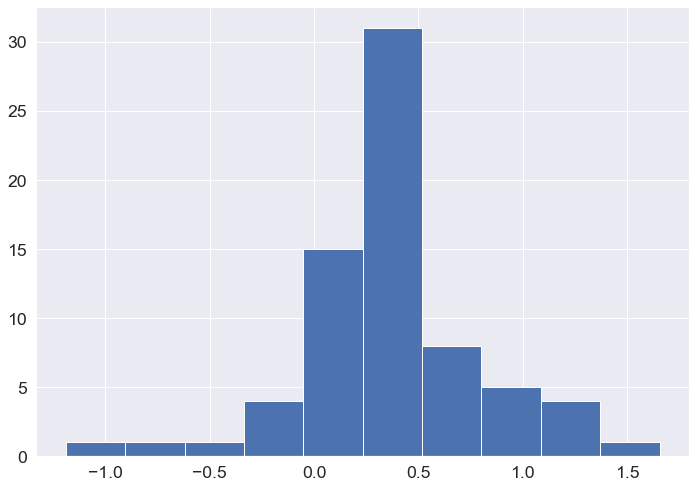

In [15]:
gmmrespdnewcum['c1'].hist()

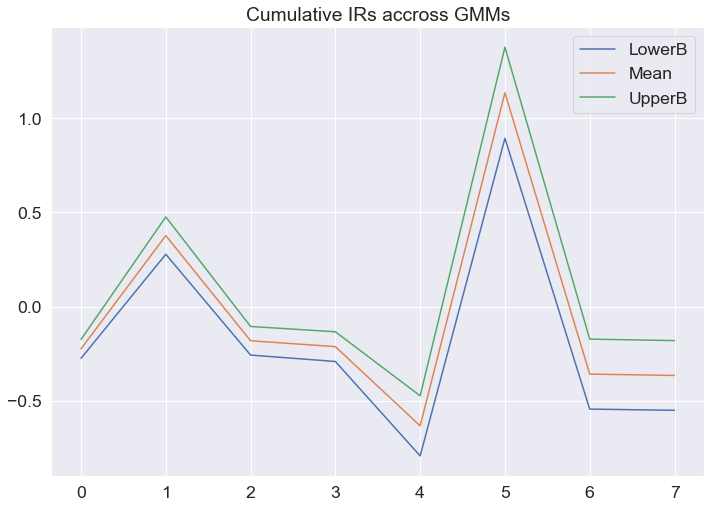

In [16]:
pltcb = pd.DataFrame(columns=['LowerB','Mean','UpperB'], index = np.arange(0,8))
pltcb['LowerB'] = (gmmrespdnewcum.mean()-1.96*gmmrespdnewcum.std()/np.sqrt(len(gmmrespdnewcum))).values
pltcb['Mean'] = (gmmrespdnewcum.mean()).values
pltcb['UpperB'] = (gmmrespdnewcum.mean()+1.96*gmmrespdnewcum.std()/np.sqrt(len(gmmrespdnewcum))).values
plt.plot(pltcb);
plt.title('Cumulative IRs accross GMMs');
plt.legend(pltcb.columns);